# Data Processing Using Python & PySpark

* **Data Processing**:

  Data processing involves collecting raw data and transforming it into meaningful information through various techniques like cleaning, integration, and analysis.

* **Python Pandas**:

  Python is a high-level, versatile programming language known for its simplicity and extensive library support for data manipulation and analysis.

  "*Data cleaning is like doing laundry: if you skip it, your results will stink.*"

* **PySpark**:

  PySpark is the Python API for Apache Spark, a distributed computing framework that enables fast and efficient processing of big data. It combines the scalability of Spark with the flexibility of Python.

  "*PySpark: Because no one likes waiting hours for their data to process.*"



### Pandas vs Spark
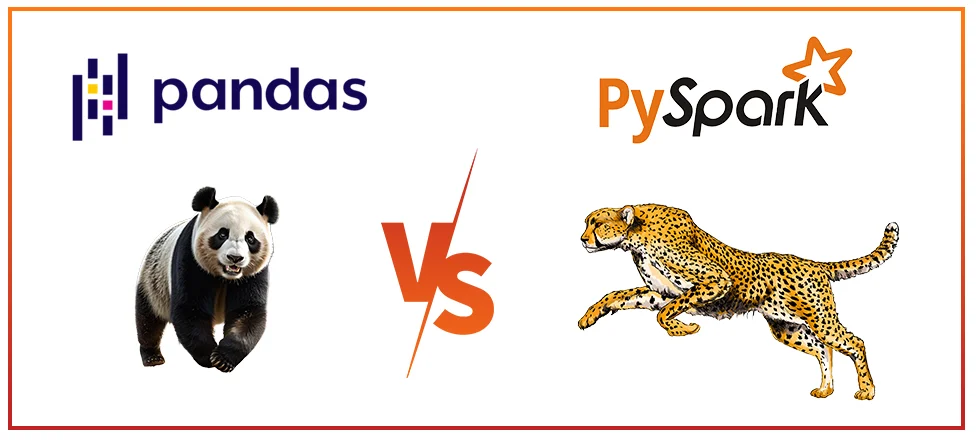


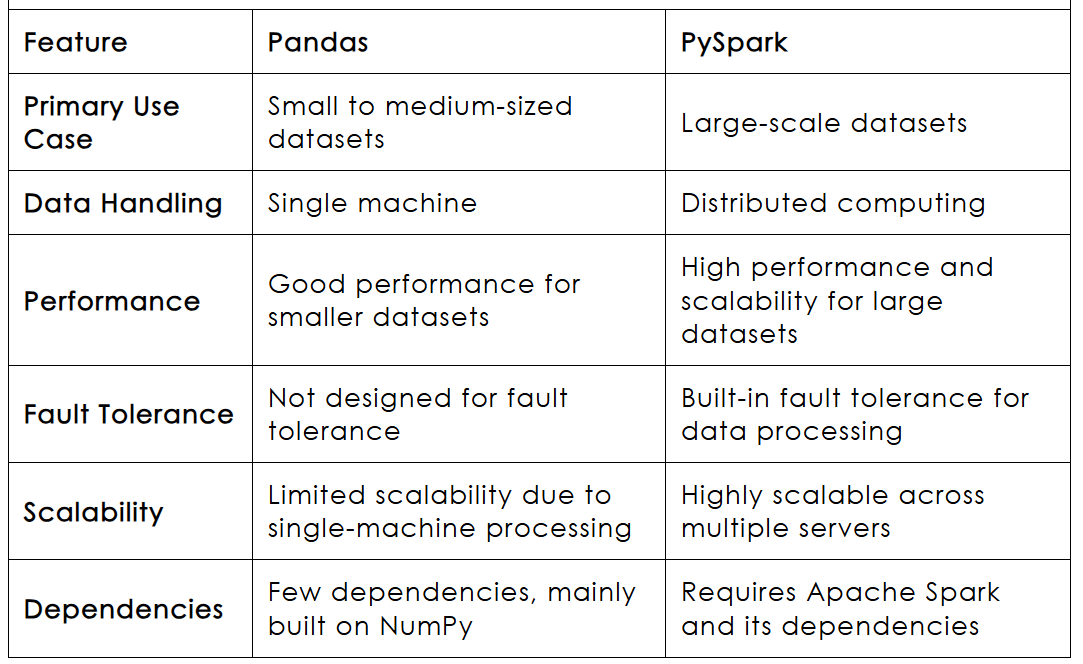


In [ ]:
# Example 1: Setup (Load Dataset)

# Import libraries
import pandas as pd
from pyspark.sql import SparkSession
from time import time

# PySpark session
spark = SparkSession.builder \
    .appName("Pandas vs PySpark Performance") \
    .getOrCreate()

# File path
file_path = "/content/drive/MyDrive/sample_data/1000000 Sales Records.csv"
# file_path ="sample_data/california_housing_train.csv"

# Load data in Pandas
start_time = time()
pandas_df = pd.read_csv(file_path)
pandas_time = time() - start_time
print(f"Pandas load time: {pandas_time:.2f} seconds")

# Load data in PySpark
start_time = time()
spark_df = spark.read.csv(file_path, header=True, inferSchema=True)
spark_time = time() - start_time
print(f"PySpark load time: {spark_time:.2f} seconds")

Pandas load time: 6.25 seconds
PySpark load time: 22.65 seconds


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pandas_df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18
5,Asia,Sri Lanka,Fruits,Online,L,11/7/2011,830192887,12/18/2011,1379,9.33,6.92,12866.07,9542.68,3323.39
6,Sub-Saharan Africa,Seychelles,Beverages,Online,M,1/18/2013,425793445,2/16/2013,597,47.45,31.79,28327.65,18978.63,9349.02
7,Sub-Saharan Africa,Tanzania,Beverages,Online,L,11/30/2016,659878194,1/16/2017,1476,47.45,31.79,70036.20,46922.04,23114.16
8,Sub-Saharan Africa,Ghana,Office Supplies,Online,L,3/23/2017,601245963,4/15/2017,896,651.21,524.96,583484.16,470364.16,113120.00
9,Sub-Saharan Africa,Tanzania,Cosmetics,Offline,L,5/23/2016,739008080,5/24/2016,7768,437.20,263.33,3396169.60,2045547.44,1350622.16


In [ ]:
# Example 2: Aggregation by Category

# Pandas Aggregation
start_time = time()
pandas_result = pandas_df.groupby("Item Type").agg({"Units Sold": "sum"}).reset_index()
pandas_time = time() - start_time
print(f"Pandas aggregation time: {pandas_time:.2f} seconds")

# PySpark Aggregation
from pyspark.sql.functions import sum as spark_sum

start_time = time()
spark_result = spark_df.groupBy("Item Type").agg(spark_sum("Units Sold").alias("sum_value"))
spark_time = time() - start_time
print(f"PySpark aggregation time: {spark_time:.2f} seconds")

Pandas aggregation time: 0.16 seconds
PySpark aggregation time: 0.23 seconds


In [ ]:
# Example 3: Filter Large Values

# Pandas Filtering
start_time = time()
pandas_filtered = pandas_df[pandas_df["Units Sold"] > 1000]
pandas_time = time() - start_time
print(f"Pandas filtering time: {pandas_time:.2f} seconds")

# PySpark Filtering
start_time = time()
spark_filtered = spark_df.filter(spark_df["Units Sold"] > 1000)
spark_time = time() - start_time
print(f"PySpark filtering time: {spark_time:.2f} seconds")

Pandas filtering time: 0.20 seconds
PySpark filtering time: 0.03 seconds


In [ ]:
# Example 4: Write Results Back to Disk

# Pandas Write
start_time = time()
pandas_filtered.to_csv("pandas_output.csv", index=False)
pandas_time = time() - start_time
print(f"Pandas write time: {pandas_time:.2f} seconds")

# PySpark Write
start_time = time()
spark_filtered.write.csv("spark_output", header=True)
spark_time = time() - start_time
print(f"PySpark write time: {spark_time:.2f} seconds")

Pandas write time: 11.07 seconds
PySpark write time: 14.96 seconds


# Architectural Workflow of Spark

1. **Spark Context**

  It is the entry point to all Spark functionalities.
It acts as a gateway, similar to a database connection in traditional systems.
Any Spark operation must go through the Spark Context.
2. **Cluster Manager and Driver Program**

  The Spark Context interacts with the Cluster Manager to allocate resources and manage jobs.
The Driver Program and Spark Context handle job execution within the cluster.
Jobs are split into smaller tasks for distributed execution.
3. **RDD Distribution and Caching**
  When an RDD (Resilient Distributed Dataset) is created, it can be partitioned and distributed across worker nodes.
The partitioned RDDs can be cached on the worker nodes to improve performance.
4. **Worker Nodes**
  Worker nodes are the slave nodes in the cluster.
Their primary role is to execute tasks assigned by the Spark Context.
Tasks are executed on the partitioned RDDs, and results are returned to the Spark Context.
5. **Task Execution Flow**

  *The Spark Context*: Takes the job submitted by the user.
Splits the job into smaller tasks.
Distributes these tasks to worker nodes.

  *Worker nodes*:
  Perform operations on the partitioned RDDs.
Return the results to the Spark Context.
6. **Scaling with Worker Nodes**

  *Increased Number of Workers*:
Jobs can be divided into more partitions, allowing parallel execution.
This significantly speeds up processing.
  *Increased Memory*:
With more workers, the total memory size increases.
Jobs can be cached more effectively, further enhancing execution speed.

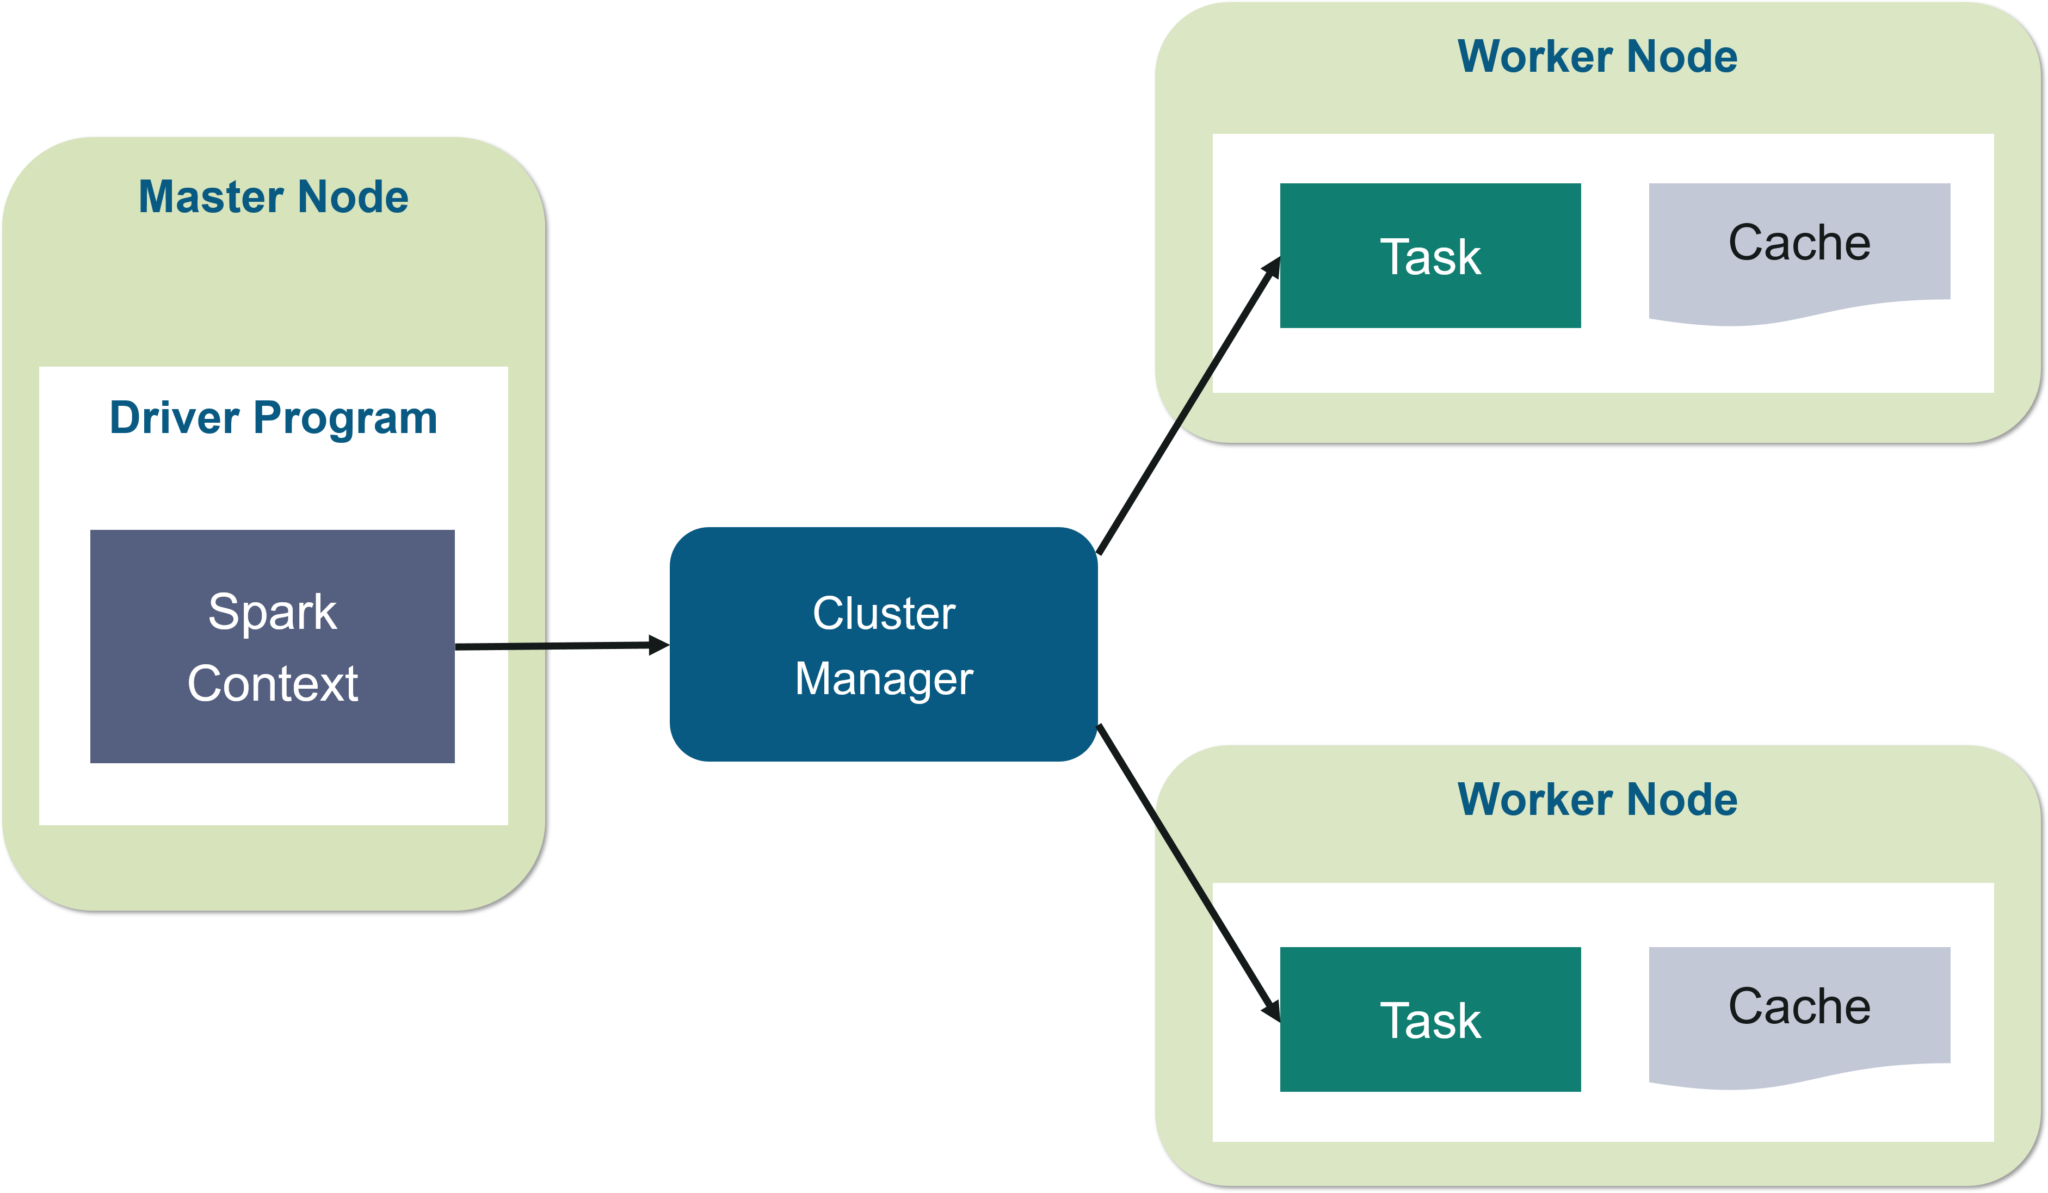


In [ ]:
# Data Cleaning with Pandas (Basic)

import pandas as pd

data = {'Name': ['Alice', 'Bob', 'Charlie', None],
        'Age': [25, None, 30, 22],
        'Salary': [50000, 60000, None, 45000]}

df = pd.DataFrame(data)
# Drop rows with missing values
df_cleaned = df.dropna()
print(df_cleaned)

    Name   Age   Salary
0  Alice  25.0  50000.0


In [ ]:
# Distributed Data Processing with pyspark (Basic)

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DataProcessing").getOrCreate()

data = [("Alice", 25, 50000),
        ("Bob", None, 60000),
        ("Charlie", 30, None),
        (None, 22, 45000)]

columns = ["Name", "Age", "Salary"]

df = spark.createDataFrame(data, columns)
# Drop rows with missing values
df_cleaned = df.na.drop()
df_cleaned.show()

+-----+---+------+
| Name|Age|Salary|
+-----+---+------+
|Alice| 25| 50000|
+-----+---+------+



# Installation and Setup of PySpark

Link : https://www.linkedin.com/pulse/step-by-step-guide-install-pyspark-windows-pc-2024-manav-nayak-wmpbf

# Job vs Stage vs Task: Understanding execution plan details for optimization.

* `Job` - A parallel computation consisting of multiple tasks that gets spawned in response to a Spark action (e.g., save(), collect()). During interactive sessions with Spark shells, the driver converts your Spark application into one or more Spark jobs. It then transforms each job into a DAG. This, in essence, is Spark’s execution plan, where each node within a DAG could be a single or multiple Spark stages.

  Characteristics:

  * Triggered by actions (e.g., df.show(), df.write(), etc.).
  * The entire execution of an action is considered a job.
  * Spark manages multiple stages and tasks within a job.

  Example: If you call df.count() on a DataFrame, Spark will create a job to count the rows and execute it.

* `Stage` - Each job gets divided into smaller sets of tasks called stages that depend on each other. As part of the DAG nodes, stages are created based on what operations can be performed serially or in parallel. Not all Spark operations can happen in a single stage, so they may be divided into multiple stages. Often stages are delineated on the operator’s computation boundaries, where they dictate data transfer among Spark executors.

  Characteristics:

  * Spark divides a job into stages based on the data shuffling needs.
  * A stage contains tasks that run in parallel and don't require shuffling between them.
  * A job can have one or more stages.
Narrow transformations (e.g., map, filter) can be grouped into a single stage, but wide transformations (e.g., groupBy, join) cause stage boundaries due to the need for shuffling data across nodes.

  Example: In a job that performs a join operation, Spark will split the job into multiple stages: one for reading the data, another for performing the shuffle during the join, and a final stage for any transformations or actions applied post-join.

* `Task` - A single unit of work or execution that will be sent to a Spark executor. Each stage is comprised of Spark tasks (a unit of execution), which are then federated across each Spark executor; each task maps to a single core and works on a single partition of data. As such, an executor with 16 cores can have 16 or more tasks working on 16 or more partitions in parallel, making the execution of Spark’s tasks exceedingly parallel!

  Characteristics:

  * A task corresponds to one partition of data in a stage.
  * Each task executes the operations in that stage (such as applying a transformation like map()).
  * The number of tasks in a stage is determined by the number of partitions in the RDD or DataFrame at that point.
  * Tasks are scheduled to run on different executors.

  Example: If a stage has 10 partitions, Spark will create 10 tasks (one for each partition), and each task will run on an executor in parallel.

```
Execution Flow (Real-life analogy)
Imagine you're hosting a cooking event:

Job: The entire cooking event, including preparation and serving of meals.
Stage: Different phases of the cooking event, like chopping vegetables, boiling, and garnishing. Some stages require more coordination (like chopping and boiling at the same time), while others don’t.
Task: Individual actions that happen in each phase of cooking, like a team member chopping vegetables or boiling water in a pot. Each team member handles one specific task at a time.
```

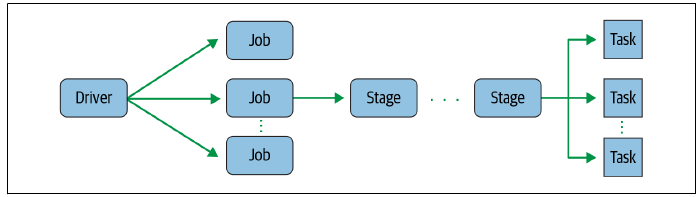







In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("JobStageTaskExample").getOrCreate()

# Sample DataFrame
data = [(1, "A"), (2, "B"), (3, "C"), (4, "D"), (5, "E")]
df = spark.createDataFrame(data, ["id", "value"])

# Triggering a job
df_grouped = df.groupBy("id").count()

# Job execution starts here
df_grouped.show()  # This action triggers the job

# In the execution plan, you would see stages and tasks breakdown
df_grouped.explain(extended=True)

+---+-----+
| id|count|
+---+-----+
|  1|    1|
|  2|    1|
|  5|    1|
|  3|    1|
|  4|    1|
+---+-----+

== Parsed Logical Plan ==
'Aggregate ['id], ['id, count(1) AS count#198L]
+- LogicalRDD [id#191L, value#192], false

== Analyzed Logical Plan ==
id: bigint, count: bigint
Aggregate [id#191L], [id#191L, count(1) AS count#198L]
+- LogicalRDD [id#191L, value#192], false

== Optimized Logical Plan ==
Aggregate [id#191L], [id#191L, count(1) AS count#198L]
+- Project [id#191L]
   +- LogicalRDD [id#191L, value#192], false

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- HashAggregate(keys=[id#191L], functions=[count(1)], output=[id#191L, count#198L])
   +- Exchange hashpartitioning(id#191L, 200), ENSURE_REQUIREMENTS, [plan_id=468]
      +- HashAggregate(keys=[id#191L], functions=[partial_count(1)], output=[id#191L, count#208L])
         +- Project [id#191L]
            +- Scan ExistingRDD[id#191L,value#192]



`Output Explanation:`

* Job: The df_grouped.show() will trigger a job.
* Stage: Spark will create stages based on the groupBy operation and any other transformations.
* Task: Each partition of the df DataFrame will execute a task in parallel during the groupBy.

In [ ]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("SalesAggregation").getOrCreate()

# Sample sales data
data = [
    (1, "Product_A", 100),
    (2, "Product_B", 150),
    (3, "Product_A", 200),
    (4, "Product_C", 50),
    (5, "Product_B", 300),
    (6, "Product_A", 150),
    (7, "Product_C", 100),
    (8, "Product_B", 50)
]

# Create DataFrame
columns = ["transaction_id", "product_id", "sales_amount"]
df = spark.createDataFrame(data, columns)

# Perform aggregation (group by product_id and sum sales_amount)
df_aggregated = df.groupBy("product_id").sum("sales_amount")

# Trigger the action to show the results (this triggers the Job)
df_aggregated.show()

# To inspect the execution plan
df_aggregated.explain(extended=True)

+----------+-----------------+
|product_id|sum(sales_amount)|
+----------+-----------------+
| Product_C|              150|
| Product_A|              450|
| Product_B|              500|
+----------+-----------------+

== Parsed Logical Plan ==
'Aggregate ['product_id], ['product_id, sum(sales_amount#214L) AS sum(sales_amount)#222L]
+- LogicalRDD [transaction_id#212L, product_id#213, sales_amount#214L], false

== Analyzed Logical Plan ==
product_id: string, sum(sales_amount): bigint
Aggregate [product_id#213], [product_id#213, sum(sales_amount#214L) AS sum(sales_amount)#222L]
+- LogicalRDD [transaction_id#212L, product_id#213, sales_amount#214L], false

== Optimized Logical Plan ==
Aggregate [product_id#213], [product_id#213, sum(sales_amount#214L) AS sum(sales_amount)#222L]
+- Project [product_id#213, sales_amount#214L]
   +- LogicalRDD [transaction_id#212L, product_id#213, sales_amount#214L], false

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- HashAggregate(keys=[product

# Spark Basics

### **SparkContext**

* It is the entry point for accessing Spark functionalities in older versions of Spark (before 2.0).
* It initializes the connection with the cluster and acts as a gateway for all operations in Spark.
* With SparkContext, you can create RDDs and interact with the cluster manager.

  #### **Key Functions**:

    * Creating RDDs.

    RDD (Resilient Distributed Dataset) is the fundamental data structure. It's an immutable, partitioned collection of data that can be distributed across a cluster of machines. RDDs provide high-level operations for parallel data processing, such as map, reduce, filter, and join. (will learn this in detail further)
    * Managing the lifecycle of jobs and tasks.

    

### **SparkSession**

* It is the unified entry point introduced in Spark 2.0 to replace SparkContext.
* It encapsulates all the SparkContext functionalities and supports working with DataFrames, SQL, and datasets.
* It simplifies the process by combining SparkContext, SQLContext, and HiveContext into one object.

  #### **Key Functions**:

    * Creating DataFrames and executing SQL queries.
    * Configuring application settings.
    * Enabling access to SparkContext when required (spark.sparkContext).

In [ ]:
# Creating a DataFrame and performing operations using SparkSession:

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("SparkSession Example") \
    .getOrCreate()

# Create a DataFrame from a list
data = [("Alice", 25), ("Bob", 30), ("Cathy", 28)]
columns = ["Name", "Age"]
df = spark.createDataFrame(data, columns)

# Show the DataFrame
df.show()

# Perform a simple SQL operation
df.createOrReplaceTempView("people")
result = spark.sql("SELECT Name, Age FROM people WHERE Age > 27")
result.show()

# Stop SparkSession
spark.stop()

+-----+---+
| Name|Age|
+-----+---+
|Alice| 25|
|  Bob| 30|
|Cathy| 28|
+-----+---+

+-----+---+
| Name|Age|
+-----+---+
|  Bob| 30|
|Cathy| 28|
+-----+---+



In [ ]:
# Creating an RDD using SparkContext:
from pyspark import SparkContext

# Initialize SparkContext
sc = SparkContext("local", "SparkContext Example")

# Create an RDD from a Python list
data = [1, 2, 3, 4, 5]
rdd = sc.parallelize(data)

# Perform an action on the RDD
print("RDD sum:", rdd.reduce(lambda a, b: a + b))

# Stop SparkContext
sc.stop()

RDD sum: 15


# Transformations vs Actions in Spark
* Transformation
  * Create a new RDD, DataFrame, or Dataset from an existing one.
  * They are lazy, meaning they don’t execute immediately. Instead, they build a logical plan of execution.
  * Examples: `map()`, `filter()`, `flatMap()`, `groupByKey()`, `reduceByKey()`.

* Actions
  * Triggers the execution of the transformations by returning values or outputting data to a storage system.
  * They execute the DAG (Directed Acyclic Graph) of transformations.
  * Examples: `collect()`, `count()`, `reduce()`, `saveAsTextFile()`.

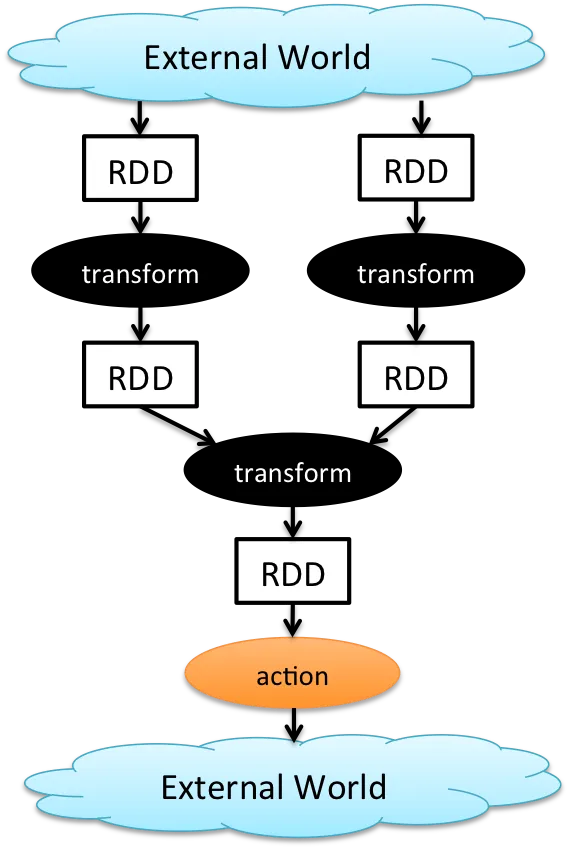



---

`Transformations`: "Making plans for a road trip."

`Actions`: "Finally hitting the road and seeing all your plans in action!"

---

#### Imagine you have the following transaction dataset:

```python
-> transactions.csv
ID,Amount,Category
1,100,Electronics
2,500,Fashion
3,50,Grocery
4,1000,Electronics
5,20,Grocery

```




In [ ]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Transformations vs Actions Example") \
    .getOrCreate()

# Load the dataset into a DataFrame
data = [("1", 100, "Electronics"),
        ("2", 500, "Fashion"),
        ("3", 50, "Grocery"),
        ("4", 1000, "Electronics"),
        ("5", 20, "Grocery")]

columns = ["ID", "Amount", "Category"]
df = spark.createDataFrame(data, columns)

# Transformation 1: Filter high-value transactions (Amount > 100)
high_value_transactions = df.filter(df.Amount > 100)

# Transformation 2: Select only the 'Amount' column
amount_only = high_value_transactions.select("Amount")

# Action 1: Count the number of high-value transactions
high_value_count = high_value_transactions.count()
print(f"Number of high-value transactions: {high_value_count}")

# Action 2: Show the resulting DataFrame
print("High-value transactions:")
high_value_transactions.show()

# Stop SparkSession
spark.stop()

Number of high-value transactions: 2
High-value transactions:
+---+------+-----------+
| ID|Amount|   Category|
+---+------+-----------+
|  2|   500|    Fashion|
|  4|  1000|Electronics|
+---+------+-----------+



Key Observations

`Transformations (Lazy)`: filter() and select() create a logical execution plan but don’t process data until an action is called.

`Actions (Eager)`:
count() and show() trigger the execution of the transformations and provide results

# What is Lazy Evaluation?

* Lazy Evaluation means that Spark delays the execution of transformations until an action is invoked.
* When you define a transformation (e.g., map(), filter()), Spark does not immediately process the data. Instead, it builds a Directed Acyclic Graph (DAG) of operations to be performed.
* The actual computation only happens when an action (like count(), collect(), show()) triggers the execution.
* This approach allows Spark to optimize the execution plan by analyzing the DAG, combining transformations where possible, and avoiding unnecessary computations.

*Lazy evaluation is like planning a party but only sending out the invites when you have enough snacks and music!*

In [ ]:
# E-commerce Data Filtering and Transformation

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Lazy Evaluation Example") \
    .getOrCreate()

# Sample e-commerce transactions dataset
data = [("1", 100, "Electronics"),
        ("2", 500, "Fashion"),
        ("3", 50, "Grocery"),
        ("4", 1000, "Electronics"),
        ("5", 200, "Fashion")]

columns = ["TransactionID", "Amount", "Category"]
df = spark.createDataFrame(data, columns)

# Transformation 1: Filter high-value transactions (Amount > 200)
high_value_transactions = df.filter(df.Amount > 200)

# Transformation 2: Apply a discount of 10%
discounted_transactions = high_value_transactions.withColumn("DiscountedAmount", high_value_transactions.Amount * 0.9)

# Transformation 3: Select only the relevant columns
final_data = discounted_transactions.select("TransactionID", "DiscountedAmount", "Category")

# No action has been triggered yet; Spark has only built the execution plan

# Action: Collect and show the final data
final_result = final_data.collect()
print(f"Final discounted transactions: {final_result}")

# Stop SparkSession
spark.stop()

Final discounted transactions: [Row(TransactionID='2', DiscountedAmount=450.0, Category='Fashion'), Row(TransactionID='4', DiscountedAmount=900.0, Category='Electronics')]


**Summary**:
* Lazy evaluation in Spark is a strategy where transformations are defined but not executed until an action is performed.
* It allows Spark to optimize and execute transformations efficiently, reducing unnecessary computation and improving overall performance.

# What is RDD?

* RDD is a fundamental data structure in Apache Spark, which is immutable and distributed. It represents a collection of objects partitioned across the nodes in the cluster and can be processed in parallel.
* RDDs allow for fault tolerance because each dataset is divided into partitions that can be recomputed if lost, using lineage information.
* RDDs are a lower-level abstraction, and they offer fine-grained control over the data and its transformations.

  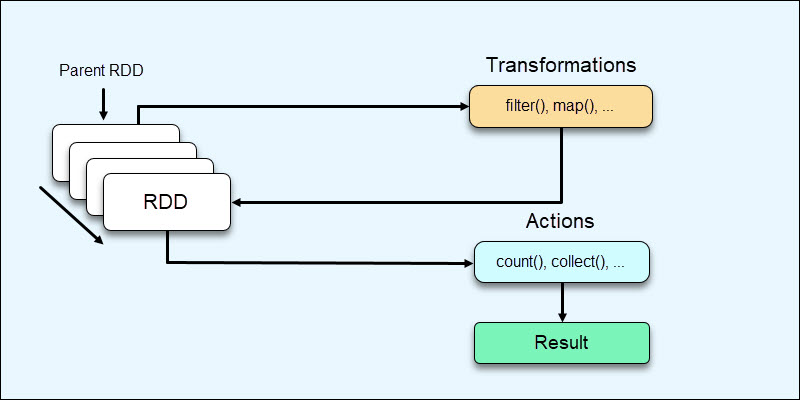



In [ ]:
# Creating and Manipulating RDDs

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("RDD Example").getOrCreate()

# Create an RDD from a list
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rdd = spark.sparkContext.parallelize(data)

# Show the RDD content (action)
print("RDD Data:", rdd.collect())

# Stop SparkSession
spark.stop()

RDD Data: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


**Key Operations on RDDs:**
`Map`: Transforms each element in the RDD based on a function.

`Filter`: Returns an RDD containing only those elements that satisfy a given condition.

`Reduce`: Aggregates the elements of the RDD using a binary function.


In [ ]:
# Map Operation : You have a list of numbers and you want to square each number.

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("Map Example").getOrCreate()

# Create an RDD from a list
data = [1, 2, 3, 4, 5]
rdd = spark.sparkContext.parallelize(data)

# Apply map operation to square each number
squared_rdd = rdd.map(lambda x: x * x)

# Show the squared results
print("Squared numbers:", squared_rdd.collect())

# Stop SparkSession
spark.stop()

Squared numbers: [1, 4, 9, 16, 25]


In [ ]:
# Filter Operation : You have a list of numbers and you want to keep only the even numbers.

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("Filter Example").getOrCreate()

# Create an RDD from a list
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rdd = spark.sparkContext.parallelize(data)

# Apply filter operation to keep only even numbers
even_rdd = rdd.filter(lambda x: x % 2 == 0)

# Show the filtered results
print("Even numbers:", even_rdd.collect())

# Stop SparkSession
spark.stop()

Even numbers: [2, 4, 6, 8, 10]


In [ ]:
# Reduce Operation : You have a list of numbers, and you want to compute the sum of all the numbers.

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("Reduce Example").getOrCreate()

# Create an RDD from a list
data = [1, 2, 3, 4, 5]
rdd = spark.sparkContext.parallelize(data)

# Apply reduce operation to sum the numbers
sum_result = rdd.reduce(lambda x, y: x + y)

# Show the result
print("Sum of numbers:", sum_result)

# Stop SparkSession
spark.stop()

Sum of numbers: 15


In [ ]:
# Combine Map, Filter, and Reduce Operations

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("Combined Operations Example").getOrCreate()

# Create an RDD of transactions (TransactionID, Amount)
transactions = [("T1", 100), ("T2", 200), ("T3", 50), ("T4", 300), ("T5", 150)]
rdd = spark.sparkContext.parallelize(transactions)

# Apply filter operation to keep transactions with Amount > 100
filtered_rdd = rdd.filter(lambda x: x[1] > 100)

# Apply map operation to extract the Amount
amount_rdd = filtered_rdd.map(lambda x: x[1])

# Apply reduce operation to sum the amounts
total_amount = amount_rdd.reduce(lambda x, y: x + y)

# Show the result
print("Total amount for transactions above threshold:", total_amount)

# Stop SparkSession
spark.stop()

Total amount for transactions above threshold: 650


# Ways to Create an RDD in PySpark

* RDDs (Resilient Distributed Datasets) can be created in multiple ways in PySpark, depending on the data source and transformation requirements. Here are the most common ways to create RDDs:

  1. From Existing Collection (e.g., List, Tuple, etc.)

   Can create an RDD from a local collection, such as a Python list or a tuple. This is the most basic way of creating an RDD in PySpark.

  2. From External Data Sources (File-based)

    Can create an RDD by reading data from external storage systems like HDFS, S3, local file systems, or any distributed file system. Common file formats include CSV, JSON, Parquet, etc.

  3. From an Existing RDD (Transformation)

    Can create new RDDs by applying transformations to existing RDDs, such as map(), filter(), flatMap(), etc. These transformations are lazily evaluated and return new RDDs.

  4. From Pair RDDs (Key-Value RDD)

    RDDs in PySpark can also be key-value pairs, which are useful for aggregating data and performing operations like grouping, reducing, etc. This type of RDD is known as a Pair RDD.

  5. From DataFrames (via rdd attribute)

    PySpark DataFrames have an rdd attribute that allows you to convert a DataFrame into an RDD. This is useful when you want to use RDD operations that are not supported directly on DataFrames.




In [ ]:
# 1. From Existing Collection (e.g., List, Tuple, etc.)

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("RDD Creation Example").getOrCreate()

# Create an RDD from a Python list
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rdd = spark.sparkContext.parallelize(data)

# Show the RDD content (action)
print("RDD Data:", rdd.collect())

# Stop SparkSession
spark.stop()

RDD Data: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
# 2. From External Data Sources (File-based)

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("RDD Creation Example").getOrCreate()

# Correct file path (provide absolute path if needed)
file_path = "/content/sample_data/hospital_data_record.txt"

# Verify the file exists before processing
import os
if os.path.exists(file_path):
    print(f"File found at {file_path}")

    # Create an RDD from the text file
    rdd = spark.sparkContext.textFile(file_path)

    # Show the RDD content (action)
    print("RDD Data from File:", rdd.collect())
else:
    print(f"File not found at {file_path}")

# Stop SparkSession
spark.stop()

File found at /content/sample_data/hospital_data_record.txt
RDD Data from File: ['data_type,data_type_series,data_date,data_name,data_authors,data_section,data_subsection,content,graphic_alt,graphic_title ONC', 'Data Brief,35,"May, 2016",Adoption of Electronic Health Record Systems among U.S. Non-Federal Acute Care Hospitals: 2008-', '2015,"JaWanna Henry, MPH; Yuriy Pylypchuk, PhD; Talisha Searcy, MPA, MA; Vaishali Patel, PhD MPH",Introduction,content,"The', 'adoption and meaningful use of electronic health records (EHRs) are key objectives of the Health Information Technology for Economic', 'and Clinical Health (HITECH) Act of 2009 and the Federal Health IT Strategic Plan (1). This brief uses data from the American Hospital', 'Association to describe trends in adoption of EHR technology among non-federal acute care hospitals from 2008 to 2015. It tracks the', 'adoption of Basic EHR systems and the possession of certified EHR technology. Unless otherwise stated, this brief refers to Ba

In [ ]:
# 3. From an Existing RDD (Transformation)

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("RDD Transformation Example").getOrCreate()

# Create an RDD from a list
data = [1, 2, 3, 4, 5]
rdd = spark.sparkContext.parallelize(data)

# Apply map transformation to create a new RDD with squared values
squared_rdd = rdd.map(lambda x: x * x)

# Show the new RDD content (action)
print("Squared RDD Data:", squared_rdd.collect())

# Stop SparkSession
spark.stop()

Squared RDD Data: [1, 4, 9, 16, 25]


In [ ]:
# 4. From Pair RDDs (Key-Value RDD)

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("Pair RDD Example").getOrCreate()

# Create a pair RDD from a list of tuples
data = [("apple", 1), ("banana", 2), ("apple", 3), ("banana", 1)]
pair_rdd = spark.sparkContext.parallelize(data)

# Perform a reduceByKey operation on the pair RDD
result_rdd = pair_rdd.reduceByKey(lambda x, y: x + y)

# Show the result (action)
print("Resulting Pair RDD:", result_rdd.collect())

# Stop SparkSession
spark.stop()

Resulting Pair RDD: [('apple', 4), ('banana', 3)]


In [ ]:
# 5. From DataFrames (via rdd attribute)

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("DataFrame to RDD Example").getOrCreate()

# Create a DataFrame
data = [("Alice", 30), ("Bob", 35), ("Cathy", 28)]
df = spark.createDataFrame(data, ["Name", "Age"])

# Convert DataFrame to RDD
rdd = df.rdd

# Show the RDD content (action)
print("RDD Data from DataFrame:", rdd.collect())

# Stop SparkSession
spark.stop()

RDD Data from DataFrame: [Row(Name='Alice', Age=30), Row(Name='Bob', Age=35), Row(Name='Cathy', Age=28)]


# DataFrames in PySpark

A DataFrame in PySpark is a distributed collection of data organized into named columns, much like a table in a relational database or a spreadsheet. It provides a higher-level abstraction over RDDs (Resilient Distributed Datasets) for data processing, making it easier to work with structured and semi-structured data.

Think of it as:

01. A table in a SQL database.
02. A DataFrame in Pandas but scalable to big data.

```python
# schema creation by passing list
df = spark.createDataFrame([
    Row(a=1, b=4., c='GFG1', d=date(2000, 8, 1),
        e=datetime(2000, 8, 1, 12, 0)),
    
    Row(a=2, b=8., c='GFG2', d=date(2000, 6, 2),  
        e=datetime(2000, 6, 2, 12, 0)),
    
    Row(a=4, b=5., c='GFG3', d=date(2000, 5, 3),
        e=datetime(2000, 5, 3, 12, 0))
])

```
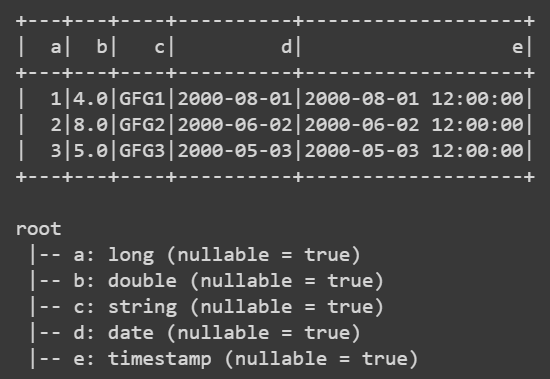



* "*If an RDD is like raw vegetables, a DataFrame is your perfectly cooked gourmet meal—structured, delicious, and ready to serve big data!*"
* "*A PySpark DataFrame is like that friend who knows SQL, JSON, and a little bit of Python—adaptable, smart, and efficient!*"


# Ways to create a dataframe in pyspark and different operations on it

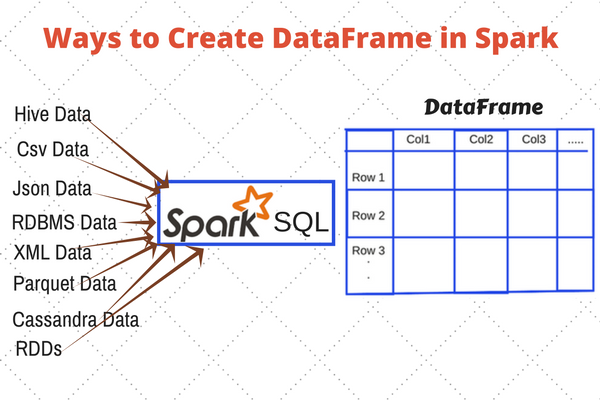

1. From Hive Data
```python
spark.sql("SELECT * FROM database_name.table_name")
```

2. From CSV Data
```python
df = spark.read.csv("path_to_csv_file", header=True, inferSchema=True)
```

3. From JSON Data
```python
df = spark.read.json("path_to_json_file")
```

4. From RDBMS Data
```python
df = spark.read.format("jdbc").options(
    url="jdbc:database_url",
    driver="driver_class_name",
    dbtable="table_name",
    user="username",
    password="password"
).load()
```

5. From XML Data (using Spark-XML library)
```python
df = spark.read.format("xml").options(rowTag="tag_name").load("path_to_xml_file")
```

6. From Parquet Data
```python
df = spark.read.parquet("path_to_parquet_file")
```

7. From Cassandra Data
```python
df = spark.read.format("org.apache.spark.sql.cassandra").options(
    table="table_name",
    keyspace="keyspace_name"
).load()
```

8. From RDDs
```python
rdd = spark.sparkContext.parallelize(data)  # Create an RDD
df = rdd.toDF(schema=["col1", "col2", "col3"])  # Convert RDD to DataFrame
```



In [ ]:
# Analyzing Customer Orders (CSV Files)
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("Customer Orders").getOrCreate()

# Load data from CSV
df = spark.read.option("header", True).csv("/content/drive/MyDrive/sample_data/tab_view_cols.csv")

# Basic operations
df.show()

+------+--------------------+--------------------+---------+-----------+--------------+----------+--------+----------+------+
|MODULE|          TABLE_NAME|         COLUMN_NAME|DATA_TYPE|DATA_LENGTH|DATA_PRECISION|DATA_SCALE|NULLABLE|TABLE_TYPE|ACTION|
+------+--------------------+--------------------+---------+-----------+--------------+----------+--------+----------+------+
|ACCRUL|             ACCOUNT|           CODE_PART| VARCHAR2|          4|          NULL|      NULL|       N|      VIEW| Added|
|ACCRUL|             ACCOUNT|CONS_CODE_PART_VALUE| VARCHAR2|         80|          NULL|      NULL|       Y|      VIEW| Added|
|ACCRUL|             ACCOUNT| EXCHANGE_DIFFERENCE| VARCHAR2|       4000|          NULL|      NULL|       Y|      VIEW| Added|
|ACCRUL|             ACCOUNT|EXCHANGE_DIFFEREN...| VARCHAR2|         80|          NULL|      NULL|       Y|      VIEW| Added|
|ACCRUL|             ACCOUNT|EXCLUDE_FROM_CURR...| VARCHAR2|       4000|          NULL|      NULL|       Y|      VIEW|

In [ ]:
df.select("table_name", "column_name").filter(df["data_length"] > 100).show()

+--------------------+--------------------+
|          table_name|         column_name|
+--------------------+--------------------+
|             ACCOUNT| EXCHANGE_DIFFERENCE|
|             ACCOUNT|EXCLUDE_FROM_CURR...|
|             ACCOUNT|  INCLUDE_IN_REV_REC|
|             ACCOUNT|KEEP_REPORTING_EN...|
|             ACCOUNT|   KEEP_REP_CURRENCY|
|ACCOUNTING_CODEPA...|        BUDGET_VALUE|
|ACCOUNTING_CODEPA...|        BUDGET_VALUE|
|ACCOUNTING_CODEPA...|        BUDGET_VALUE|
|ACCOUNTING_CODEPA...|        BUDGET_VALUE|
|ACCOUNTING_CODEPA...|        BUDGET_VALUE|
|ACCOUNTING_CODEPA...|        BUDGET_VALUE|
|ACCOUNTING_CODEPA...|        BUDGET_VALUE|
|ACCOUNTING_CODEPA...|        BUDGET_VALUE|
|ACCOUNTING_CODEPA...|        BUDGET_VALUE|
|ACCOUNTING_CODEPA...|        BUDGET_VALUE|
|ACCOUNTING_CODE_P...|CODE_PART_MAPPING...|
|ACCOUNTING_CODE_P...|      SYSTEM_DEFINED|
|ACCOUNTING_CODE_P...|      MASTER_COMPANY|
|ACCOUNTING_CODE_P...|             OBJTYPE|
|   ACCOUNTING_PERIOD|      ATTR

### Operations on Dataframe

In [ ]:
# Schema: To understand the structure.

df.printSchema()

root
 |-- MODULE: string (nullable = true)
 |-- TABLE_NAME: string (nullable = true)
 |-- COLUMN_NAME: string (nullable = true)
 |-- DATA_TYPE: string (nullable = true)
 |-- DATA_LENGTH: string (nullable = true)
 |-- DATA_PRECISION: string (nullable = true)
 |-- DATA_SCALE: string (nullable = true)
 |-- NULLABLE: string (nullable = true)
 |-- TABLE_TYPE: string (nullable = true)
 |-- ACTION: string (nullable = true)



In [ ]:
# Row Count:

print("Total Rows:", df.count())

Total Rows: 45528


In [ ]:
# Preview Data: Show the first few rows.

df.show(5, truncate=False)

+------+----------+-----------------------+---------+-----------+--------------+----------+--------+----------+------+
|MODULE|TABLE_NAME|COLUMN_NAME            |DATA_TYPE|DATA_LENGTH|DATA_PRECISION|DATA_SCALE|NULLABLE|TABLE_TYPE|ACTION|
+------+----------+-----------------------+---------+-----------+--------------+----------+--------+----------+------+
|ACCRUL|ACCOUNT   |CODE_PART              |VARCHAR2 |4          |NULL          |NULL      |N       |VIEW      |Added |
|ACCRUL|ACCOUNT   |CONS_CODE_PART_VALUE   |VARCHAR2 |80         |NULL          |NULL      |Y       |VIEW      |Added |
|ACCRUL|ACCOUNT   |EXCHANGE_DIFFERENCE    |VARCHAR2 |4000       |NULL          |NULL      |Y       |VIEW      |Added |
|ACCRUL|ACCOUNT   |EXCHANGE_DIFFERENCE_DB |VARCHAR2 |80         |NULL          |NULL      |Y       |VIEW      |Added |
|ACCRUL|ACCOUNT   |EXCLUDE_FROM_CURR_TRANS|VARCHAR2 |4000       |NULL          |NULL      |Y       |VIEW      |Added |
+------+----------+-----------------------+-----

## PySpark DataFrame `show()` with `truncate` Parameter

### Explanation:

- `df.show(5)`: Displays the first 5 rows of the DataFrame, but by default, it truncates long strings (typically after 20 characters) and replaces the extra part with `...`.
- `truncate=False`: Ensures that all column values are displayed in full, no matter how long they are.

### Example:

#### Without `truncate=False` (default behavior)
```python
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Example").getOrCreate()
data = [(1, "This is a very long string"), (2, "Short string")]
df = spark.createDataFrame(data, ["id", "text"])
df.show()
```
**Output:**
```
+---+--------------------+
|id |text                |
+---+--------------------+
| 1 |This is a very lo...|
| 2 |Short string        |
+---+--------------------+
```
(Long text is truncated)

#### With `truncate=False`
```python
df.show(truncate=False)
```
**Output:**
```
+---+--------------------------+
|id |text                      |
+---+--------------------------+
|1  |This is a very long string|
|2  |Short string              |
+---+--------------------------+
```
(Full text is displayed)


In [ ]:
# Select Specific Columns:

df.select("MODULE", "TABLE_NAME", "COLUMN_NAME").show(5)

+------+----------+--------------------+
|MODULE|TABLE_NAME|         COLUMN_NAME|
+------+----------+--------------------+
|ACCRUL|   ACCOUNT|           CODE_PART|
|ACCRUL|   ACCOUNT|CONS_CODE_PART_VALUE|
|ACCRUL|   ACCOUNT| EXCHANGE_DIFFERENCE|
|ACCRUL|   ACCOUNT|EXCHANGE_DIFFEREN...|
|ACCRUL|   ACCOUNT|EXCLUDE_FROM_CURR...|
+------+----------+--------------------+
only showing top 5 rows



In [ ]:
# Rename Columns:

df.withColumnRenamed("DATA_TYPE", "COLUMN_TYPE").show(5)

+------+----------+--------------------+-----------+-----------+--------------+----------+--------+----------+------+
|MODULE|TABLE_NAME|         COLUMN_NAME|COLUMN_TYPE|DATA_LENGTH|DATA_PRECISION|DATA_SCALE|NULLABLE|TABLE_TYPE|ACTION|
+------+----------+--------------------+-----------+-----------+--------------+----------+--------+----------+------+
|ACCRUL|   ACCOUNT|           CODE_PART|   VARCHAR2|          4|          NULL|      NULL|       N|      VIEW| Added|
|ACCRUL|   ACCOUNT|CONS_CODE_PART_VALUE|   VARCHAR2|         80|          NULL|      NULL|       Y|      VIEW| Added|
|ACCRUL|   ACCOUNT| EXCHANGE_DIFFERENCE|   VARCHAR2|       4000|          NULL|      NULL|       Y|      VIEW| Added|
|ACCRUL|   ACCOUNT|EXCHANGE_DIFFEREN...|   VARCHAR2|         80|          NULL|      NULL|       Y|      VIEW| Added|
|ACCRUL|   ACCOUNT|EXCLUDE_FROM_CURR...|   VARCHAR2|       4000|          NULL|      NULL|       Y|      VIEW| Added|
+------+----------+--------------------+-----------+----

In [ ]:
# Filter Rows by Condition:

df.filter(df["NULLABLE"] == "Y").show(5)
df.filter(df["DATA_LENGTH"] > 50).show(5)

+------+--------------------+--------------------+---------+-----------+--------------+----------+--------+----------+-----------+
|MODULE|          TABLE_NAME|         COLUMN_NAME|DATA_TYPE|DATA_LENGTH|DATA_PRECISION|DATA_SCALE|NULLABLE|TABLE_TYPE|     ACTION|
+------+--------------------+--------------------+---------+-----------+--------------+----------+--------+----------+-----------+
|ACCRUL|             ACCOUNT|CONS_CODE_PART_VALUE| VARCHAR2|         80|          NULL|      NULL|       Y|      VIEW|Discontinud|
|ACCRUL|FACT_CURRENCY_RAT...| EXCHANGE_DIFFERENCE| VARCHAR2|       4000|          NULL|      NULL|       Y|      VIEW|      Added|
|ACCRUL|FACT_CURRENCY_RAT...|EXCHANGE_DIFFEREN...| VARCHAR2|         80|          NULL|      NULL|       Y|      VIEW|Discontinud|
|ACCRUL|FACT_CURRENCY_RAT...|EXCLUDE_FROM_CURR...| VARCHAR2|       4000|          NULL|      NULL|       Y|     TABLE|      Added|
|ACCRUL|      DIM_ACCOUNT_OL|   KEEP_REP_CURRENCY| VARCHAR2|         80|          N

In [ ]:
# Sort by a Column:

df.sort("DATA_LENGTH").show(5)

+------+--------------------+--------------------+---------+-----------+--------------+----------+--------+----------+-----------+
|MODULE|          TABLE_NAME|         COLUMN_NAME|DATA_TYPE|DATA_LENGTH|DATA_PRECISION|DATA_SCALE|NULLABLE|TABLE_TYPE|     ACTION|
+------+--------------------+--------------------+---------+-----------+--------------+----------+--------+----------+-----------+
|ACCRUL|             ACCOUNT|           CODE_PART| VARCHAR2|          4|          NULL|      NULL|       N|     TABLE|      Added|
|ACCRUL|       DIM_CODE_B_DM|        BUDGET_VALUE| VARCHAR2|          4|          NULL|      NULL|       Y|      VIEW|Discontinud|
|BISERV|EXT_TRANSACTIONS_TAB|THIRD_CURR_TAX_BA...|   NUMBER|         22|          NULL|      NULL|       Y|     TABLE|      Added|
|BISERV|FACT_CURRENCY_RAT...|DIRECT_CURRENCY_RATE|   NUMBER|         22|          NULL|      NULL|       Y|     TABLE|Discontinud|
|BISERV|      DIM_ACCOUNT_OL|DIRECT_CURRENCY_R...|   NUMBER|         22|          N

In [ ]:
# Sort Descending:

df.sort(df["DATA_LENGTH"].desc()).show(5)

+------+--------------------+--------------------+---------+-----------+--------------+----------+--------+----------+-------+
|MODULE|          TABLE_NAME|         COLUMN_NAME|DATA_TYPE|DATA_LENGTH|DATA_PRECISION|DATA_SCALE|NULLABLE|TABLE_TYPE| ACTION|
+------+--------------------+--------------------+---------+-----------+--------------+----------+--------+----------+-------+
|ACCRUL|FACT_CURRENCY_RAT...| EXCHANGE_DIFFERENCE| VARCHAR2|       4000|          NULL|      NULL|       Y|      VIEW|  Added|
|ACCRUL|FACT_CURRENCY_RAT...|EXCLUDE_FROM_CURR...| VARCHAR2|       4000|          NULL|      NULL|       Y|     TABLE|  Added|
|BISERV|       DIM_CODE_B_DM|   BUDGET_VALUE_DESC| VARCHAR2|        400|          NULL|      NULL|       Y|      VIEW|  Added|
|ACCRUL|      DIM_ACCOUNT_OL|KEEP_REP_CURRENCY...| VARCHAR2|        400|          NULL|      NULL|       Y|      VIEW|Deleted|
|BISERV|FACT_CURRENCY_RAT...|                  ID| VARCHAR2|        184|          NULL|      NULL|       Y|    

In [ ]:
# Get Distinct Values in a Column:

df.select("ACTION").distinct().show()

+-----------+
|     ACTION|
+-----------+
|      Added|
|Discontinud|
|    Deleted|
+-----------+



In [ ]:
# Count Distinct Values:

print("Distinct Modules:", df.select("MODULE").distinct().count())

Distinct Modules: 2


In [ ]:
# Group by a Column:

df.groupBy("MODULE").count().show()

+------+-----+
|MODULE|count|
+------+-----+
|ACCRUL|    9|
|BISERV|    7|
+------+-----+



In [ ]:
# Group and Perform Aggregations:

from pyspark.sql.functions import avg, max

df.groupBy("MODULE").agg(
    avg("DATA_LENGTH").alias("avg_length"),
    max("DATA_LENGTH").alias("max_length")
).show()

+------+------------------+----------+
|MODULE|        avg_length|max_length|
+------+------------------+----------+
|ACCRUL|2147.5055986218777|    8|4000|
|  AIIM|              NULL|   4000|56|
|APPPAY| 669.3033707865169|        80|
|APPSRV|             433.0|     80|80|
|BENADM|              51.0|     80|22|
|BIAXSV|             120.0|       120|
|BISERV|            954.15|        80|
| BOEXP|              NULL|   200|200|
|BUDPRO|1312.6808510638298|      8|22|
| CALLC|1451.1724137931035|     80|80|
|CAREER| 825.0909090909091|       800|
|   CBS|413.53846153846155|     80|80|
|CBSINT|              22.0|        22|
|CFGBKO|             400.0|     80|80|
|CFGCHR|1251.8095238095239|     80|80|
|CFGRUL|1054.6666666666667|        96|
|CHMGMT| 871.6842105263158|    80|100|
|CONACC|            957.25|       624|
|CONMGT| 766.3586206896551|     80|80|
|  COST| 987.3333333333334|    80|100|
+------+------------------+----------+
only showing top 20 rows



In [ ]:
# Pivot by ACTION Column:

df.groupBy("MODULE").pivot("ACTION").count().show()

+------+-----+--------+-------+
|MODULE|Added|Modified|Removed|
+------+-----+--------+-------+
|NATSTD|    8|      17|      1|
|FINCON| NULL|      22|   NULL|
|    PM|  291|    NULL|   NULL|
|JINSUI| NULL|      17|   NULL|
|   DOP|   98|     145|    112|
|EMPSRV|   39|      14|   NULL|
|MPBINT|   12|    NULL|   NULL|
|STRACO|  349|     149|     90|
|BISERV|  120|    NULL|   NULL|
| PURCH| 1500|     683|    309|
|SUBVAL|   82|      57|      6|
|SRVQUO|   54|      48|     17|
|FNDMIG| NULL|      73|   NULL|
|TAXLED|  267|     163|     30|
| CALLC|   57|      80|      1|
|PERCOS|    5|      58|   NULL|
| PCERT|   19|      34|   NULL|
|PAYINT|    9|      32|   NULL|
|  FMEA|    4|      54|      3|
|ECOMAN|  151|      85|    156|
+------+-----+--------+-------+
only showing top 20 rows



In [ ]:
# Add a Derived Column:

df = df.withColumn("DATA_SIZE", df["DATA_LENGTH"] * 2)
df.show(5)

+------+--------------------+--------------------+---------+-----------+--------------+----------+--------+----------+-----------+---------+
|MODULE|          TABLE_NAME|         COLUMN_NAME|DATA_TYPE|DATA_LENGTH|DATA_PRECISION|DATA_SCALE|NULLABLE|TABLE_TYPE|     ACTION|DATA_SIZE|
+------+--------------------+--------------------+---------+-----------+--------------+----------+--------+----------+-----------+---------+
|ACCRUL|             ACCOUNT|           CODE_PART| VARCHAR2|          4|          NULL|      NULL|       N|     TABLE|      Added|        8|
|ACCRUL|             ACCOUNT|CONS_CODE_PART_VALUE| VARCHAR2|         80|          NULL|      NULL|       Y|      VIEW|Discontinud|      160|
|ACCRUL|FACT_CURRENCY_RAT...| EXCHANGE_DIFFERENCE| VARCHAR2|       4000|          NULL|      NULL|       Y|      VIEW|      Added|     8000|
|ACCRUL|FACT_CURRENCY_RAT...|EXCHANGE_DIFFEREN...| VARCHAR2|         80|          NULL|      NULL|       Y|      VIEW|Discontinud|      160|
|ACCRUL|FACT_

In [ ]:
# Add a Conditional Column:

from pyspark.sql.functions import when

df = df.withColumn("IS_VIEW", when(df["TABLE_TYPE"] == "VIEW", 1).otherwise(0))
df.show(5)

+------+--------------------+--------------------+---------+-----------+--------------+----------+--------+----------+-----------+---------+-------+
|MODULE|          TABLE_NAME|         COLUMN_NAME|DATA_TYPE|DATA_LENGTH|DATA_PRECISION|DATA_SCALE|NULLABLE|TABLE_TYPE|     ACTION|DATA_SIZE|IS_VIEW|
+------+--------------------+--------------------+---------+-----------+--------------+----------+--------+----------+-----------+---------+-------+
|ACCRUL|             ACCOUNT|           CODE_PART| VARCHAR2|          4|          NULL|      NULL|       N|     TABLE|      Added|        8|      0|
|ACCRUL|             ACCOUNT|CONS_CODE_PART_VALUE| VARCHAR2|         80|          NULL|      NULL|       Y|      VIEW|Discontinud|      160|      1|
|ACCRUL|FACT_CURRENCY_RAT...| EXCHANGE_DIFFERENCE| VARCHAR2|       4000|          NULL|      NULL|       Y|      VIEW|      Added|     8000|      1|
|ACCRUL|FACT_CURRENCY_RAT...|EXCHANGE_DIFFEREN...| VARCHAR2|         80|          NULL|      NULL|       Y

In [ ]:
# Drop a Single Column:

df = df.drop("DATA_PRECISION")
df.show(5)

+------+--------------------+--------------------+---------+-----------+----------+--------+----------+-----------+---------+-------+
|MODULE|          TABLE_NAME|         COLUMN_NAME|DATA_TYPE|DATA_LENGTH|DATA_SCALE|NULLABLE|TABLE_TYPE|     ACTION|DATA_SIZE|IS_VIEW|
+------+--------------------+--------------------+---------+-----------+----------+--------+----------+-----------+---------+-------+
|ACCRUL|             ACCOUNT|           CODE_PART| VARCHAR2|          4|      NULL|       N|     TABLE|      Added|        8|      0|
|ACCRUL|             ACCOUNT|CONS_CODE_PART_VALUE| VARCHAR2|         80|      NULL|       Y|      VIEW|Discontinud|      160|      1|
|ACCRUL|FACT_CURRENCY_RAT...| EXCHANGE_DIFFERENCE| VARCHAR2|       4000|      NULL|       Y|      VIEW|      Added|     8000|      1|
|ACCRUL|FACT_CURRENCY_RAT...|EXCHANGE_DIFFEREN...| VARCHAR2|         80|      NULL|       Y|      VIEW|Discontinud|      160|      1|
|ACCRUL|FACT_CURRENCY_RAT...|EXCLUDE_FROM_CURR...| VARCHAR2|  

In [ ]:
# Join with Another DataFrame

# Create a second DataFrame for joining
other_df = spark.createDataFrame(
    [("ACCRUL", "Extra Info"), ("BILLING", "More Info")],
    ["MODULE", "DETAILS"]
)

# Perform an Inner Join
joined_df = df.join(other_df, on="MODULE", how="inner")
joined_df.show()

# joined_df.tail(10)

+------+--------------------+--------------------+---------+-----------+----------+--------+----------+-----------+---------+-------+----------+
|MODULE|          TABLE_NAME|         COLUMN_NAME|DATA_TYPE|DATA_LENGTH|DATA_SCALE|NULLABLE|TABLE_TYPE|     ACTION|DATA_SIZE|IS_VIEW|   DETAILS|
+------+--------------------+--------------------+---------+-----------+----------+--------+----------+-----------+---------+-------+----------+
|ACCRUL|             ACCOUNT|           CODE_PART| VARCHAR2|          4|      NULL|       N|     TABLE|      Added|        8|      0|Extra Info|
|ACCRUL|             ACCOUNT|CONS_CODE_PART_VALUE| VARCHAR2|         80|      NULL|       Y|      VIEW|Discontinud|      160|      1|Extra Info|
|ACCRUL|FACT_CURRENCY_RAT...| EXCHANGE_DIFFERENCE| VARCHAR2|       4000|      NULL|       Y|      VIEW|      Added|     8000|      1|Extra Info|
|ACCRUL|FACT_CURRENCY_RAT...|EXCHANGE_DIFFEREN...| VARCHAR2|         80|      NULL|       Y|      VIEW|Discontinud|      160|     

In [ ]:
# Register the DataFrame as a SQL Table:

df.createOrReplaceTempView("data_table")

In [ ]:
# Run SQL Queries:

spark.sql("SELECT MODULE, COUNT(*) as Count FROM data_table GROUP BY MODULE").show()

+------+-----+
|MODULE|Count|
+------+-----+
|ACCRUL|    9|
|BISERV|    7|
+------+-----+



In [ ]:
# Export to CSV:
output_path = '/content/output_path'
df.write.option("header", True).mode("overwrite").csv(output_path)

In [ ]:
# Export  to Parquet:
df.write.parquet("output_path")

# Use Case based Dataframe Operations

https://github.com/coder2j/pyspark-tutorial/blob/main/07-DataFrame-Operations.ipynb

# Introduction to PySpark SQL

PySpark SQL is a module in PySpark that integrates relational processing with Spark's functional programming API. It allows you to perform SQL-like operations on large datasets, enabling efficient data analysis and manipulation.

The `pyspark.sql` is used to perform SQL-like operations. You can either leverage using programming API to query the data or use the ANSI SQL queries similar to RDBMS. You can also mix both, for example, use API on the result of an SQL query.

### Following are the important classes from the SQL module.


`pyspark.sql.SparkSession`– SparkSession is the main entry point for DataFrame and SQL functionality. It is responsible for coordinating the execution of SQL queries and DataFrame operations. SparkSession can be created using the SparkSession.builder API. It encapsulates the functionality of the older SQLContext and HiveContext.

`pyspark.sql.DataFrame` – DataFrame is a distributed collection of data organized into named columns. DataFrames can be created from various sources like CSV, JSON, Parquet, Hive, etc., and they can be transformed using a rich set of high-level operations.

`pyspark.sql.Column` – A column expression in a DataFrame.It can be used to reference, manipulate, and transform columns.

`pyspark.sql.Row` – A row of data in a DataFrame.Rows are used to store and manipulate data in a distributed and structured way. Each Row object can be thought of as a record or a tuple with named fields, similar to a row in a relational database table.

`pyspark.sql.GroupedData` – An object type returned by DataFrame.groupBy() This class provides methods for calculating summary statistics, aggregating data, and applying various functions to grouped data.

`pyspark.sql.DataFrameNaFunctions` – Methods for handling missing data (null values). This class is specifically designed to handle operations related to missing data and provides functionalities for filling, dropping, and replacing null values in a PySpark DataFrame.

`pyspark.sql.DataFrameStatFunctions` – This class is part of the PySpark SQL module and is designed to facilitate the computation of summary statistics on numerical columns in a DataFrame. It offers methods for calculating various descriptive statistics, correlation, covariance, and more.

`pyspark.sql.functions` – List of standard built-in functions.

`pyspark.sql.types` – Available SQL data types in PySpark.

`pyspark.sql.Window` – Would be used to work with window functions.

**Key Features of PySpark SQL:**

* DataFrame API: Provides a programming abstraction called DataFrames, which are distributed collections of data organized into named columns. This is similar to a table in a relational database or a data frame in Python's pandas library.

* SQL Queries: Enables execution of SQL queries directly within the PySpark application, allowing seamless integration between SQL and complex analytics.

* Data Source Integration: Supports various data sources, including Hive tables, Parquet, JSON, and JDBC, facilitating easy data ingestion and processing.

**Let's delve into a practical example** using PySpark SQL to analyze a dataset of 15 employee records. We'll demonstrate how to:

* Initialize the Spark Session
* Create a DataFrame from the dataset
* Register the DataFrame as a SQL temporary view
* Execute SQL queries to perform various analyses

In [ ]:
# 1. Initialize the Spark Session

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("EmployeeDataAnalysis") \
    .getOrCreate()

In [ ]:
# 2. Create a DataFrame from the Dataset

# Sample employee data
employee_data = [
    (1, "John Doe", "Engineering", 100000),
    (2, "Jane Smith", "Marketing", 80000),
    (3, "Sam Brown", "Engineering", 120000),
    (4, "Lisa Ray", "HR", 70000),
    (5, "Michael Johnson", "Marketing", 85000),
    (6, "Emily Davis", "Engineering", 95000),
    (7, "David Wilson", "HR", 72000),
    (8, "Laura Lee", "Engineering", 115000),
    (9, "Daniel Kim", "Marketing", 78000),
    (10, "Sophia Turner", "HR", 73000),
    (11, "James White", "Engineering", 105000),
    (12, "Olivia Harris", "Marketing", 82000),
    (13, "Robert Martin", "Engineering", 98000),
    (14, "Isabella Clark", "HR", 71000),
    (15, "William Lewis", "Marketing", 79000)
]

# Define schema
columns = ["EmployeeID", "Name", "Department", "MonthlySalary"]

# Create DataFrame
df = spark.createDataFrame(employee_data, schema=columns)

# Show the DataFrame
df.show()

+----------+---------------+-----------+-------------+
|EmployeeID|           Name| Department|MonthlySalary|
+----------+---------------+-----------+-------------+
|         1|       John Doe|Engineering|       100000|
|         2|     Jane Smith|  Marketing|        80000|
|         3|      Sam Brown|Engineering|       120000|
|         4|       Lisa Ray|         HR|        70000|
|         5|Michael Johnson|  Marketing|        85000|
|         6|    Emily Davis|Engineering|        95000|
|         7|   David Wilson|         HR|        72000|
|         8|      Laura Lee|Engineering|       115000|
|         9|     Daniel Kim|  Marketing|        78000|
|        10|  Sophia Turner|         HR|        73000|
|        11|    James White|Engineering|       105000|
|        12|  Olivia Harris|  Marketing|        82000|
|        13|  Robert Martin|Engineering|        98000|
|        14| Isabella Clark|         HR|        71000|
|        15|  William Lewis|  Marketing|        79000|
+---------

In [ ]:
# 3. Register the DataFrame as a SQL Temporary View

df.createOrReplaceTempView("employees")

In [ ]:
# Query to select all records
result = spark.sql("SELECT * FROM employees")
result.show()

+----------+---------------+-----------+-------------+
|EmployeeID|           Name| Department|MonthlySalary|
+----------+---------------+-----------+-------------+
|         1|       John Doe|Engineering|       100000|
|         2|     Jane Smith|  Marketing|        80000|
|         3|      Sam Brown|Engineering|       120000|
|         4|       Lisa Ray|         HR|        70000|
|         5|Michael Johnson|  Marketing|        85000|
|         6|    Emily Davis|Engineering|        95000|
|         7|   David Wilson|         HR|        72000|
|         8|      Laura Lee|Engineering|       115000|
|         9|     Daniel Kim|  Marketing|        78000|
|        10|  Sophia Turner|         HR|        73000|
|        11|    James White|Engineering|       105000|
|        12|  Olivia Harris|  Marketing|        82000|
|        13|  Robert Martin|Engineering|        98000|
|        14| Isabella Clark|         HR|        71000|
|        15|  William Lewis|  Marketing|        79000|
+---------

In [ ]:
# Query to calculate annual salary
result = spark.sql("""
    SELECT Name, Department, MonthlySalary, (MonthlySalary * 12) AS AnnualSalary
    FROM employees
""")
result.show()

+---------------+-----------+-------------+------------+
|           Name| Department|MonthlySalary|AnnualSalary|
+---------------+-----------+-------------+------------+
|       John Doe|Engineering|       100000|     1200000|
|     Jane Smith|  Marketing|        80000|      960000|
|      Sam Brown|Engineering|       120000|     1440000|
|       Lisa Ray|         HR|        70000|      840000|
|Michael Johnson|  Marketing|        85000|     1020000|
|    Emily Davis|Engineering|        95000|     1140000|
|   David Wilson|         HR|        72000|      864000|
|      Laura Lee|Engineering|       115000|     1380000|
|     Daniel Kim|  Marketing|        78000|      936000|
|  Sophia Turner|         HR|        73000|      876000|
|    James White|Engineering|       105000|     1260000|
|  Olivia Harris|  Marketing|        82000|      984000|
|  Robert Martin|Engineering|        98000|     1176000|
| Isabella Clark|         HR|        71000|      852000|
|  William Lewis|  Marketing|  

In [ ]:
# Query to filter employees in Engineering department
result = spark.sql("""
    SELECT Name, MonthlySalary
    FROM employees
    WHERE Department = 'Engineering'
""")
result.show()

+-------------+-------------+
|         Name|MonthlySalary|
+-------------+-------------+
|     John Doe|       100000|
|    Sam Brown|       120000|
|  Emily Davis|        95000|
|    Laura Lee|       115000|
|  James White|       105000|
|Robert Martin|        98000|
+-------------+-------------+



In [ ]:
# Query to calculate average monthly salary per department
result = spark.sql("""
    SELECT Department, AVG(MonthlySalary) AS AvgMonthlySalary
    FROM employees
    GROUP BY Department
""")
result.show()

+-----------+----------------+
| Department|AvgMonthlySalary|
+-----------+----------------+
|Engineering|        105500.0|
|         HR|         71500.0|
|  Marketing|         80800.0|
+-----------+----------------+



In [ ]:
# e. Identify Top Earners in Each Department

from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

# Define window specification
window_spec = Window.partitionBy("Department").orderBy(df["MonthlySalary"].desc())

# Add row number to each partition
df_with_row_num = df.withColumn("row_number", row_number().over(window_spec))
df_with_row_num.show()
# Filter to get the top earner in each department
top_earners = df_with_row_num.filter(df_with_row_num["row_number"] == 1).drop("row_number")
top_earners.show()

+----------+---------------+-----------+-------------+----------+
|EmployeeID|           Name| Department|MonthlySalary|row_number|
+----------+---------------+-----------+-------------+----------+
|         3|      Sam Brown|Engineering|       120000|         1|
|         8|      Laura Lee|Engineering|       115000|         2|
|        11|    James White|Engineering|       105000|         3|
|         1|       John Doe|Engineering|       100000|         4|
|        13|  Robert Martin|Engineering|        98000|         5|
|         6|    Emily Davis|Engineering|        95000|         6|
|        10|  Sophia Turner|         HR|        73000|         1|
|         7|   David Wilson|         HR|        72000|         2|
|        14| Isabella Clark|         HR|        71000|         3|
|         4|       Lisa Ray|         HR|        70000|         4|
|         5|Michael Johnson|  Marketing|        85000|         1|
|        12|  Olivia Harris|  Marketing|        82000|         2|
|         

The above example demonstrates how to use PySpark SQL to perform various data analyses on a dataset of employee records. By registering a DataFrame as a temporary view, we can leverage the power of SQL queries to manipulate and analyze data efficiently.

# Joins in PySpark (Inner, Outer, Left, Right)

Joins in PySpark allow you to combine data from two DataFrames based on a common column or key. PySpark supports various types of joins: inner, outer, left, and right, among others.

1. Inner Join

  An inner join returns only the rows that have matching keys in both DataFrames.
  ```python
  df1.join(df2, on="key", how="inner")
  ```
2. Left Join

  A left join returns all rows from the left DataFrame and the matching rows from the right DataFrame. Non-matching rows in the right DataFrame will have null values.
  ```python
  df1.join(df2, on="key", how="left")
  ```
3. Right Join

  A right join returns all rows from the right DataFrame and the matching rows from the left DataFrame. Non-matching rows in the left DataFrame will have null values.
  ```python
  df1.join(df2, on="key", how="right")
  ```
4. Outer Join

  An outer join returns all rows from both DataFrames. Non-matching rows will have null values in the respective columns.
  ```python
  df1.join(df2, on="key", how="outer")
    ```

### Key Points
`Inner Join`: Includes only matching rows.

`Left Join`: Includes all rows from the left and matches from the right.

`Right Join`: Includes all rows from the right and matches from the left.

`Outer Join`: Includes all rows from both DataFrames.

### Best Practices
* `Filter Before Join`: If possible, filter rows before joining to reduce data shuffling.
* `Broadcast Joins`: Use broadcast() for small DataFrames to optimize joins.
* `Partitioning`: Ensure both DataFrames are partitioned properly to improve performance.

 Filter Before Join (Push Down Filtering)

Why?

Filtering data before joining reduces the number of records involved in the join, minimizing data shuffling and improving performance.

What is Shuffling?

Shuffling in PySpark is the process of redistributing data across different partitions or nodes in the cluster. It happens when a task requires data from multiple partitions to be exchanged between executors.

Why Does Shuffling Happen?

Shuffling occurs during operations that require data to be rearranged or grouped, such as:

Joins (except broadcast joins)

GroupBy & Aggregations

Repartitioning (repartition())

Sort operations

Example of Shuffling in a Join

❌ Regular Join (Causes Shuffling)

```python
joined_df = df1.join(df2, "id")
joined_df.show()
```

Example:

❌ Without Filtering (Inefficient)

```python
joined_df = df1.join(df2, "id")
joined_df.show()
```

✅ With Filtering (Efficient)


```
filtered_df1 = df1.filter(df1.status == "active")
joined_df = filtered_df1.join(df2, "id")
joined_df.show()
```

✅ Only relevant rows are processed, reducing memory and execution time.

2️⃣ Broadcast Joins (For Small DataFrames)

What is Broadcast Join?

A broadcast join is an optimization technique where a small DataFrame is copied to all worker nodes, avoiding shuffling and improving join performance.

What Happens Internally?

Spark broadcasts the small DataFrame to all nodes.

Each worker gets a local copy, eliminating network shuffling.

The join is performed locally, making it much faster.

Example:

❌ Without Broadcast (Slow, Causes Shuffling)
```
joined_df = df_large.join(df_small, "id")
joined_df.show()
```
✅ With Broadcast (Fast, No Shuffling)
```
from pyspark.sql.functions import broadcast

joined_df = df_large.join(broadcast(df_small), "id")
joined_df.show()
```
✅ Broadcasting avoids unnecessary shuffling, improving performance.

Tuning Broadcast Join Threshold

By default, Spark automatically broadcasts tables ≤10MB. You can change this threshold:
```
spark.conf.set("spark.sql.autoBroadcastJoinThreshold", "50MB")
```
3️⃣ Partitioning for Better Performance

Why?

Ensuring both DataFrames have the same partitioning reduces shuffle and improves join efficiency.

Example:

❌ Without Proper Partitioning (High Shuffle)
```
joined_df = df1.join(df2, "id")
joined_df.show()
```
✅ With Proper Partitioning (Optimized)
```
df1 = df1.repartition("id")
df2 = df2.repartition("id")
joined_df = df1.join(df2, "id")
joined_df.show()
```
✅ Since both DataFrames are partitioned by id, shuffle is minimized, speeding up the join.

Understanding Shuffling in PySpark



✅ Using Broadcast Join (No Shuffling)
```
from pyspark.sql.functions import broadcast
joined_df = df1.join(broadcast(df2), "id")
joined_df.show()
```
Summary of Shuffling
```
# Checking the number of partitions before and after a join
print("Partitions before join:", df1.rdd.getNumPartitions())
print("Partitions before join:", df2.rdd.getNumPartitions())

joined_df = df1.join(df2, "id")
print("Partitions after join:", joined_df.rdd.getNumPartitions())
```
Concept

Shuffling Happens?

Impact

Regular Joins

✅ Yes

Slow due to network transfer

GroupBy Aggregations

✅ Yes

Data moves across partitions

Repartition()

✅ Yes

Changes the partitioning of data

Broadcast Join

❌ No

Avoids shuffle by replicating small DataFrame

Summary of Join Optimizations

# Optimized join using filtering and broadcasting
filtered_df1 = df1.filter(df1.status == "active")
joined_df = filtered_df1.join(broadcast(df2), "id")
joined_df.show()

Optimization

Benefit

Filter Before Join

Reduces the number of rows processed, minimizing shuffle.

Broadcast Join

Avoids network shuffle by distributing small DataFrame to all nodes.

Partitioning

Ensures efficient data distribution, reducing shuffle and execution time.




### Scenario based Demonstration:
As a Data Engineer, we are tasked with building a reporting system for an e-commerce platform.

You have two datasets:
* Customer Data (customers_df): Contains customer details.
* Order Data (orders_df): Contains order details for those customers.
we need to prepare different views by joining these datasets to support various reporting requirements.

In [ ]:
# Dataset 1: Customers

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("Join Use Case").getOrCreate()

# Sample data for customers
customers_data = [
    (1, "Alice", "USA"),
    (2, "Bob", "Canada"),
    (3, "Charlie", "UK"),
    (4, "Diana", "Australia")
]
customers_columns = ["CustomerID", "CustomerName", "Country"]

customers_df = spark.createDataFrame(customers_data, customers_columns)
customers_df.show()

+----------+------------+---------+
|CustomerID|CustomerName|  Country|
+----------+------------+---------+
|         1|       Alice|      USA|
|         2|         Bob|   Canada|
|         3|     Charlie|       UK|
|         4|       Diana|Australia|
+----------+------------+---------+



In [ ]:
# Dataset 2: Orders

# Sample data for orders
orders_data = [
    (101, 1, 250.50),
    (102, 2, 150.00),
    (103, 5, 300.00),  # CustomerID 5 does not exist in customers_df
    (104, 3, 200.75)
]
orders_columns = ["OrderID", "CustomerID", "OrderAmount"]

orders_df = spark.createDataFrame(orders_data, orders_columns)
orders_df.show()

+-------+----------+-----------+
|OrderID|CustomerID|OrderAmount|
+-------+----------+-----------+
|    101|         1|      250.5|
|    102|         2|      150.0|
|    103|         5|      300.0|
|    104|         3|     200.75|
+-------+----------+-----------+



In [ ]:
# 1. Inner Join: Orders with Existing Customers
# Retrieve only the orders where the CustomerID exists in both datasets.

inner_join_df = orders_df.join(customers_df, on="CustomerID", how="inner")
inner_join_df.show()

+----------+-------+-----------+------------+-------+
|CustomerID|OrderID|OrderAmount|CustomerName|Country|
+----------+-------+-----------+------------+-------+
|         1|    101|      250.5|       Alice|    USA|
|         2|    102|      150.0|         Bob| Canada|
|         3|    104|     200.75|     Charlie|     UK|
+----------+-------+-----------+------------+-------+



In [ ]:
# 2. Left Join: Customers and Their Orders
# Retrieve all customers, including those who haven't placed orders.

left_join_df = customers_df.join(orders_df, on="CustomerID", how="left")
left_join_df.show()

+----------+------------+---------+-------+-----------+
|CustomerID|CustomerName|  Country|OrderID|OrderAmount|
+----------+------------+---------+-------+-----------+
|         1|       Alice|      USA|    101|      250.5|
|         2|         Bob|   Canada|    102|      150.0|
|         3|     Charlie|       UK|    104|     200.75|
|         4|       Diana|Australia|   NULL|       NULL|
+----------+------------+---------+-------+-----------+



In [ ]:
# 3. Right Join: All Orders and Associated Customers
# Retrieve all orders, including those placed by unknown customers.

right_join_df = orders_df.join(customers_df, on="CustomerID", how="right")
right_join_df.show()

+----------+-------+-----------+------------+---------+
|CustomerID|OrderID|OrderAmount|CustomerName|  Country|
+----------+-------+-----------+------------+---------+
|         1|    101|      250.5|       Alice|      USA|
|         2|    102|      150.0|         Bob|   Canada|
|         3|    104|     200.75|     Charlie|       UK|
|         4|   NULL|       NULL|       Diana|Australia|
+----------+-------+-----------+------------+---------+



In [ ]:
# 4. Outer Join: Combine All Information
# Retrieve all customers and all orders, regardless of whether they match.

outer_join_df = customers_df.join(orders_df, on="CustomerID", how="outer")
outer_join_df.show()

+----------+------------+---------+-------+-----------+
|CustomerID|CustomerName|  Country|OrderID|OrderAmount|
+----------+------------+---------+-------+-----------+
|         1|       Alice|      USA|    101|      250.5|
|         2|         Bob|   Canada|    102|      150.0|
|         3|     Charlie|       UK|    104|     200.75|
|         4|       Diana|Australia|   NULL|       NULL|
|         5|        NULL|     NULL|    103|      300.0|
+----------+------------+---------+-------+-----------+



# User-Defined Python Function in Spark (UDF)

A User-Defined Function (UDF) in PySpark allows you to create custom transformations that aren't natively supported by Spark SQL or DataFrame APIs. UDFs let you apply Python logic to manipulate, filter, or process your data.

#### How UDFs Work

* **Definition**: A UDF is created by defining a Python function and then registering it as a UDF using pyspark.sql.functions.udf.
* **Usage**: You can apply the UDF to a DataFrame column or multiple columns using the .withColumn method or in SQL queries.
* **Performance Considerations**: UDFs can be slower than built-in functions because data needs to be (In the given context, serialization refers to the process of converting a data object (e.g., a row or column value in a Spark DataFrame) into a format that can be efficiently transferred between different parts of a system, such as between the JVM (Java Virtual Machine) where Spark runs and Python workers where User-Defined Functions (UDFs) execute.

🔹 What Happens Internally?
Spark operates on JVM: Most of Spark's core operations are executed in the JVM.
Python UDFs run separately: When using a Python UDF, Spark must send data from the JVM to Python.
Serialization occurs: Data is converted into a structured format (e.g., pickle, JSON) so it can be transferred.
Data is deserialized in Python: The serialized data is converted back into Python objects, processed, and then re-serialized to return results to Spark.
🔹 Why Does Serialization Affect Performance?
Overhead of data conversion: Converting data between JVM and Python adds extra computational cost.
Data transfer latency: Sending large amounts of serialized data between JVM and Python workers can slow down execution.
Garbage collection impact: Frequent serialization/deserialization can increase memory usage and cause delays.) and sent to Python workers. Spark's native SQL functions should be preferred where possible.


#### Why do we need a UDF?
* UDF’s are used to extend the functions of the framework and re-use these functions on multiple DataFrame’s. For example, you wanted to convert every first letter of a word in a name string to a capital case; PySpark build-in features don’t have this function hence you can create it a UDF and reuse this as needed on many Data Frames. UDF’s are once created they can be re-used on several DataFrame’s and SQL expressions.

#### Example Use Case: Customizing Data
Imagine you are working with a dataset of product reviews, and you want to classify reviews into categories based on their lengths.


In [ ]:
# Dataset

from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder.appName("UDF Example").getOrCreate()

# Sample data
data = [
    (1, "This product is excellent!"),
    (2, "Okay product."),
    (3, "Not worth the money. Very poor quality."),
    (4, "Average performance."),
]
columns = ["ReviewID", "ReviewText"]

df = spark.createDataFrame(data, columns)
df.show()

+--------+--------------------+
|ReviewID|          ReviewText|
+--------+--------------------+
|       1|This product is e...|
|       2|       Okay product.|
|       3|Not worth the mon...|
|       4|Average performance.|
+--------+--------------------+



In [ ]:
# Define a Python function to classify reviews based on their text length.

def classify_review_length(text):
    length = len(text)
    if length > 30:
        return "Long"
    elif 15 <= length <= 30:
        return "Medium"
    else:
        return "Short"

In [ ]:
# Convert the Python function into a Spark UDF.

from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Register UDF
classify_review_length_udf = udf(classify_review_length, StringType())

In [ ]:
# Use the UDF to create a new column.

df_with_length_class = df.withColumn("ReviewLengthClass", classify_review_length_udf(df["ReviewText"]))
df_with_length_class.show()

+--------+--------------------+-----------------+
|ReviewID|          ReviewText|ReviewLengthClass|
+--------+--------------------+-----------------+
|       1|This product is e...|           Medium|
|       2|       Okay product.|            Short|
|       3|Not worth the mon...|             Long|
|       4|Average performance.|           Medium|
+--------+--------------------+-----------------+



Another example of UDF



In [ ]:
# Import important libraries
from pyspark.sql import SparkSession

# Creating a Spark session
spark = SparkSession.builder.getOrCreate()

# Create a DataFrame
data = [('1', 'aman anand'), ('2', 'abhishek sharma'), ('3', 'arnab joshi')]
columns = ['id', 'username']
df = spark.createDataFrame(data, columns)

# Display output
df.show(truncate=False)

+---+---------------+
|id |username       |
+---+---------------+
|1  |aman anand     |
|2  |abhishek sharma|
|3  |arnab joshi    |
+---+---------------+



In [ ]:
def ConvertUpperCase(name_str):
    # Split the name string to separate first and last name
    split_str = name_str.split()

    # Initialize an empty string
    empty_str = ""

    for x in split_str:
        # Capitalize the first letter and concatenate the remaining part
        empty_str = empty_str + x[0:1].upper() + x[1:len(x)] + " "

    # Strip the resulting string to remove extra spaces at the end
    res_string = empty_str.strip()
    return res_string

In [ ]:
# Importing udf function to define a UDF
from pyspark.sql.functions import udf

# Importing PySpark data types
from pyspark.sql.types import StringType

# Define a UDF 'convert_to_uppercase_udf'
# It will take values from the username column of the DataFrame,
# pass it to the custom function 'ConvertUpperCase',
# and finally return the values passed by that function.
convert_to_uppercase_udf = udf(ConvertUpperCase, StringType())

In [ ]:
# A new column 'upper_case_username' is created with values returned by the UDF
df = df.withColumn('upper_case_username', convert_to_uppercase_udf(df['username']))
df.show(truncate=False)

+---+---------------+-------------------+
|id |username       |upper_case_username|
+---+---------------+-------------------+
|1  |aman anand     |Aman Anand         |
|2  |abhishek sharma|Abhishek Sharma    |
|3  |arnab joshi    |Arnab Joshi        |
+---+---------------+-------------------+



# Performance Tuning  : Salting for data skew, using repartition/coalesce, and caching strategies.

It is critical for optimizing data processing workflows, especially when dealing with large datasets. Three key techniques for performance tuning are salting for data skew, using repartition/coalesce, and caching strategies. Here’s an explanation and examples for each:

### Salting
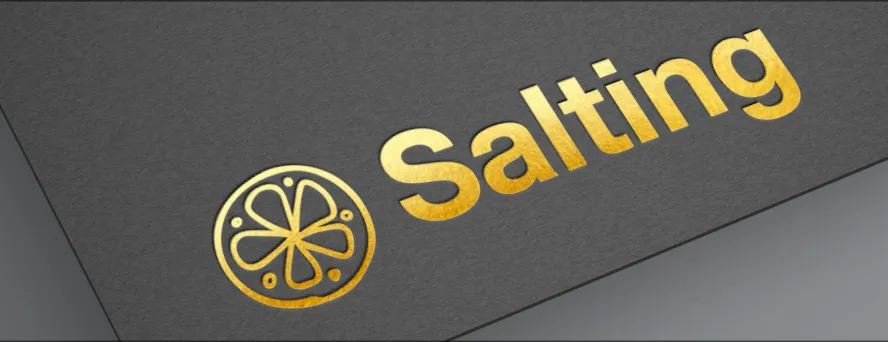

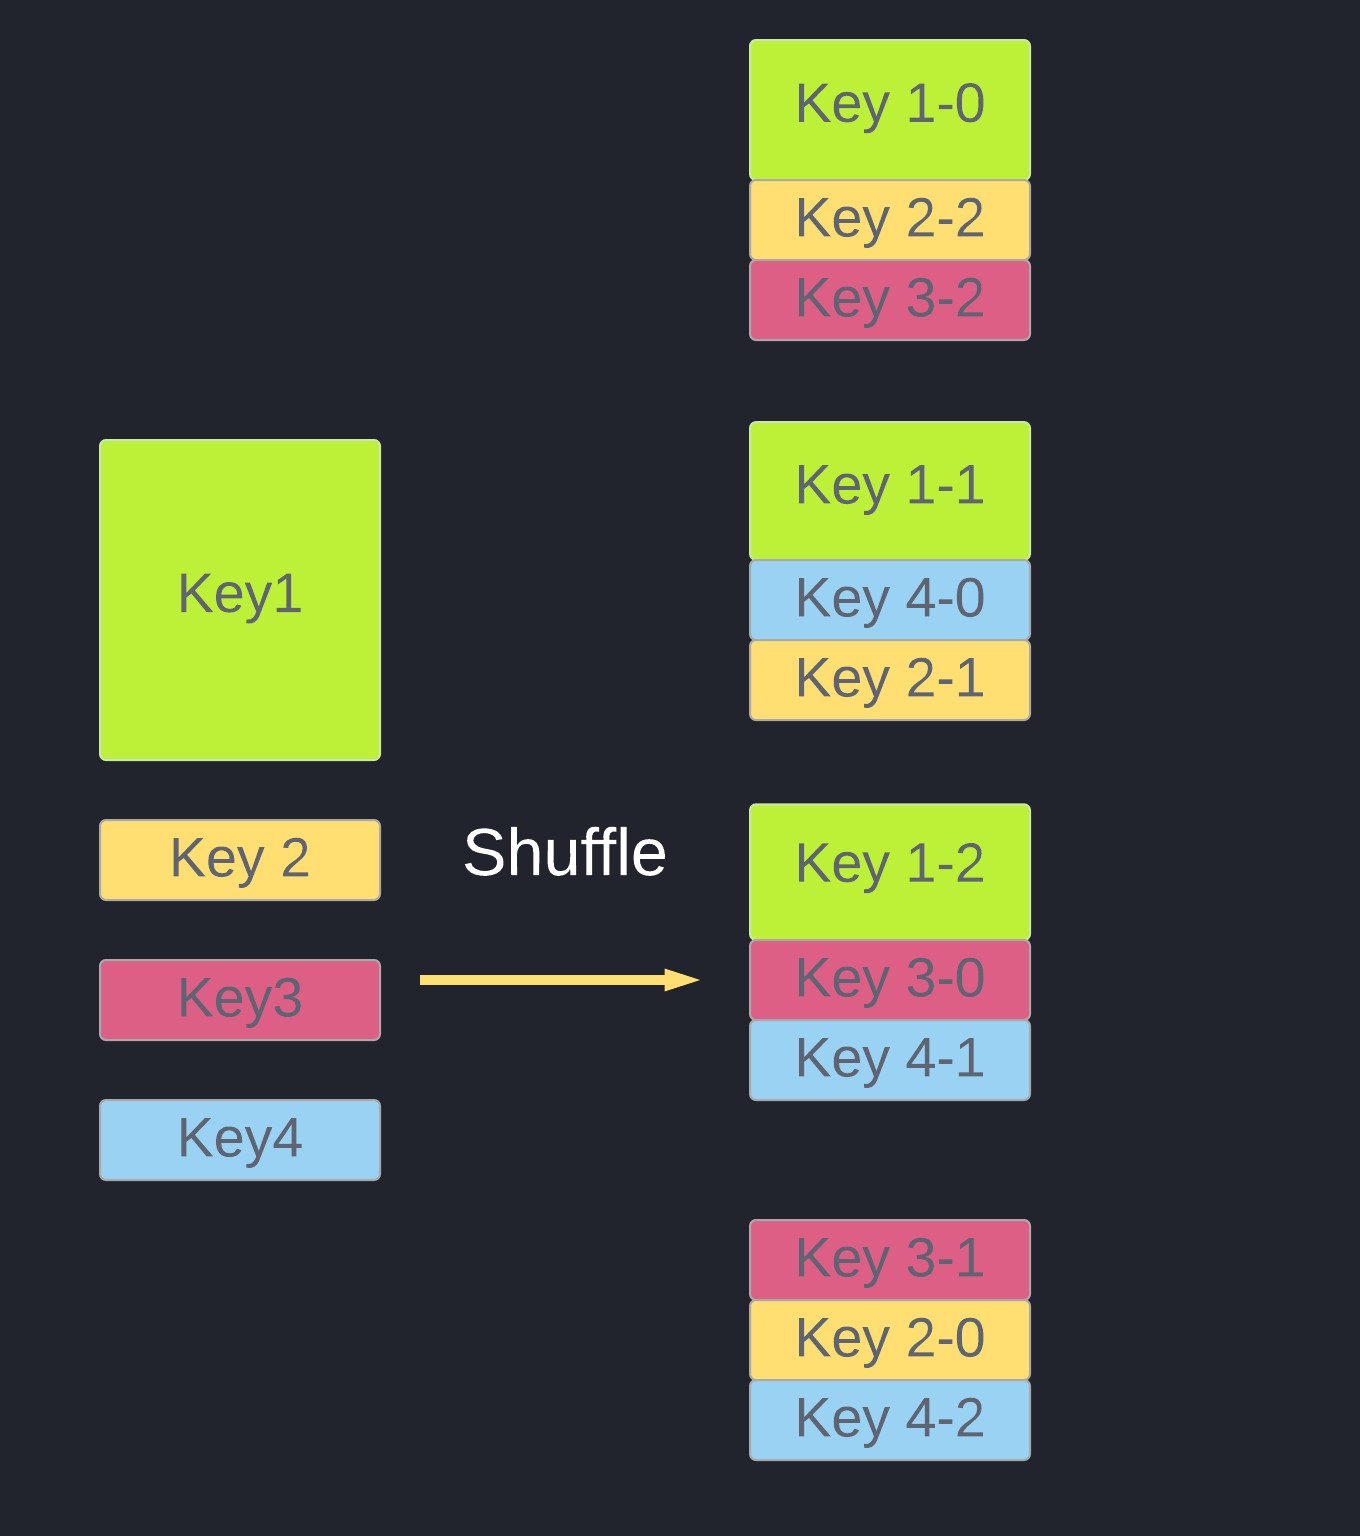

## 1. Salting for Data Skew
 Data skew occurs when certain keys in the dataset have a significantly larger number of records compared to others. This can lead to an uneven distribution of data across partitions, causing some nodes to handle disproportionately larger loads, which slows down the entire job.

Problems Caused by Data Skew

Uneven Load Distribution: Some nodes process significantly more data, leading to bottlenecks.

Increased Processing Time: Skewed partitions take longer to complete, delaying the entire job.

Higher Memory Usage: A heavily loaded node may run out of memory, causing failures.

Salting is a technique to mitigate data skew by adding a random "salt" value to the keys before shuffling the data. This distributes the data more evenly across partitions.

* Adding the Salt: Each record’s join or group by key is appended with a random string.
* Hashing the Salted Key: The salted key is then hashed using a hash function, which distributes the data more uniformly across partitions based on the hash value.

Use Case Example: Suppose you have a dataset where the column city has a skewed distribution, with most records belonging to New York.

```python
from pyspark.sql.functions import col, concat, lit, rand

# Add a random "salt" to the key to mitigate data skew
df_salted = df.withColumn(
    "salted_key",  # Create a new column called "salted_key"
    concat(
        col("city"),  # Take the value from the "city" column
        lit("_"),  # Add a literal underscore (_) as a separator
        (rand() * 10).cast("int")  # Generate a random integer between 0 and 9
        # This creates a random variation (salt) for the same "city" value
    )
)
# At this point, records with the same "city" value (e.g., "New York") will now have
# different "salted_key" values, such as "New York_0", "New York_1", etc.
# This ensures that records originally assigned to a single partition
# are distributed more evenly across multiple partitions during operations like joins or aggregations.

# Perform a grouping operation on the salted key
result = df_salted.groupBy("salted_key").count()
# - groupBy("salted_key"): Groups the data by the new "salted_key" column.
# - count(): Counts the number of records in each group.
# The use of "salted_key" ensures that data skew is reduced during the shuffle stage,
# as records that originally had the same key are now spread across multiple partitions.

# This approach is typically used in joins or aggregations where the "city" column
# has a high skew (e.g., most rows belong to a single city like "New York").
# After salting and processing, you may need to desalt the data if needed,
# by aggregating the results back to the original "city" column.

```

This spreads out the New York records across multiple partitions, improving performance.


`Another Code Example: Salting in Action`

Let’s see how salting works with a practical example. Imagine we have a DataFrame with a user ID (user_id) column and want to group users by purchase count. Here's how we can achieve this with and without salting:


In [ ]:
# Without Salting (Prone to Skew):
from pyspark.sql import SparkSession

# Initialize a SparkSession
spark = SparkSession.builder \
    .appName("ParquetReader") \
    .getOrCreate()

data = spark.read.parquet("/content/drive/MyDrive/sample_data/purchase_record.parquet")
userPurchases = data.groupBy("user_id").count()
userPurchases.show()

+-------+-----+
|user_id|count|
+-------+-----+
|    1.0|    5|
|    4.0|    7|
|    3.0|    7|
|    2.0|    6|
|    5.0|    7|
+-------+-----+



In the above scenario, if a few user IDs have significantly more purchases than others, those partitions holding the skewed user IDs will be overloaded, slowing down the entire grouping operation.

In [ ]:
from pyspark.sql.functions import col, concat, lit, rand

# import org.apache.spark.sql.functions._
data = spark.read.parquet("/content/sample_data/purchase_record.parquet")

# Add controlled salting by appending a random integer in a range
saltedData = data.withColumn("salted_user_id", concat(col("user_id"), lit("_"), (rand() * 10).cast("int")))

# Group by salted_user_id
userPurchasesSalted = saltedData.groupBy("salted_user_id").count()
userPurchasesSalted.show()

+--------------+-----+
|salted_user_id|count|
+--------------+-----+
|         4.0_1|    1|
|         4.0_2|    1|
|         5.0_8|    1|
|         5.0_5|    1|
|         1.0_2|    1|
|         1.0_8|    1|
|         3.0_9|    3|
|         4.0_8|    1|
|         4.0_5|    2|
|         3.0_3|    1|
|         2.0_8|    1|
|         1.0_0|    1|
|         2.0_6|    2|
|         3.0_4|    1|
|         4.0_3|    1|
|         5.0_1|    1|
|         1.0_4|    1|
|         2.0_7|    1|
|         1.0_1|    1|
|         5.0_9|    1|
+--------------+-----+
only showing top 20 rows



#### Why Are the Outputs Different Each Time?
- In the salted case:

    The `rand()` function introduces randomness to the salt, so every execution generates different salt values.
    This is why the salted_user_id and corresponding counts vary with each run.


#### How to Aggregate Back After Salting
If you want the final count per user_id, you need to aggregate back after removing the salt. Here's how you can do it:

In [ ]:
# Aggregate back to original user_id
final_userPurchases = userPurchasesSalted.withColumn("user_id", col("salted_user_id").substr(1, 3).cast("double")) \
                                         .groupBy("user_id").sum("count") \
                                         .withColumnRenamed("sum(count)", "total_purchases")

final_userPurchases.show()

+-------+---------------+
|user_id|total_purchases|
+-------+---------------+
|    1.0|              5|
|    4.0|              7|
|    3.0|              7|
|    2.0|              6|
|    5.0|              7|
+-------+---------------+



#### Key Takeaways
* `Without Salting`: Data skew may occur if certain keys (e.g., user_id) dominate the data, slowing down operations.
* `With Salting`: Adding a salt spreads data more evenly across partitions, improving performance by avoiding skew.
* `Post-Processing`: Always aggregate back to the original key (e.g., user_id) to get meaningful results after using salting.

#### PySpark DataFrame repartition() vs coalesce()

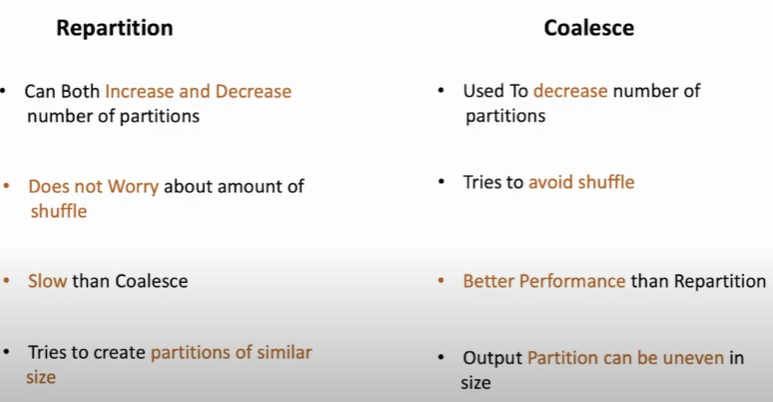

`repartition()`
* Increases or decreases the number of partitions.
* Performs a full shuffle of data.
* More expensive due to shuffling.
* Adjusting partitions for better parallelism or when increasing partitions.
* Allows increasing or decreasing partitions.

`coalesce()`
* Reduces the number of partitions.
* Avoids a full shuffle if possible.
* Faster as it minimizes data movement.
* Consolidating partitions for more efficient processing.
* Can only reduce partitions.


`Key Considerations : When to Use what?`

`repartition()`
```
01. When increasing the number of partitions for better parallelism.
02. For operations like join, where pre-partitioning on a specific column can improve performance.
03. When working with an unevenly distributed dataset.

```
`coalesce()`
```
01. When reducing partitions to optimize downstream operations (e.g., reducing file writes).
02. For final stages of processing where shuffling is unnecessary.
03. Avoiding excessive shuffle for performance-sensitive operations.
```

In [ ]:
# 1. repartition()
# Suppose we have a DataFrame with a single partition that needs to be processed
# by multiple workers for better parallelism.

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("RepartitionExample").getOrCreate()

# Sample DataFrame
data = [(1, "A"), (2, "B"), (3, "C"), (4, "D"), (5, "E")]
df = spark.createDataFrame(data, ["id", "value"])

# Initial Partition Count
print(f"Initial partitions: {df.rdd.getNumPartitions()}")  # Default depends on environment

# Repartition to 4 partitions
df_repartitioned = df.repartition(4)

# Check Partition Count
print(f"Partitions after repartition: {df_repartitioned.rdd.getNumPartitions()}")

Initial partitions: 2
Partitions after repartition: 4


In [ ]:
# 2. coalesce()
# Suppose we have a large DataFrame spread across many partitions,
# but the next operation is narrow and doesn’t require many partitions (e.g., writing to a single file).

# Assume a large dataset with many partitions
large_df = spark.range(0, 100000).repartition(10)  # Initial partition count = 10

# Coalesce to 2 partitions
df_coalesced = large_df.coalesce(2)

# Check Partition Count
print(f"Partitions after coalesce: {df_coalesced.rdd.getNumPartitions()}")

Partitions after coalesce: 2


In [ ]:
# Repartition: Increase partitions for distributed processing
df_repartitioned = large_df.repartition(400)

# Coalesce: Reduce partitions for efficient output
df_coalesced = df_repartitioned.coalesce(50)

# Save to disk
df_coalesced.write.mode("overwrite").parquet("path/to/output")

In [ ]:
# Scenario: Processing Sales Data for Report Generation
# Dataset: Large sales data stored in multiple files with many small partitions.
# Goal: Optimize the data processing pipeline for better performance in different stages.

from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.appName("RepartitionVsCoalesce").getOrCreate()

# Simulated sales data
sales_data = spark.createDataFrame(
    [(i, f"Product-{i%10}", i*10) for i in range(1, 1001)],
    ["sale_id", "product_id", "amount"]
)

# Check the number of partitions initially
print(f"Initial partitions: {sales_data.rdd.getNumPartitions()}")

# Step 1: Repartitioning for a Compute-Intensive Task
# Example: Calculate total sales per product
repartitioned_data = sales_data.repartition(10, col("product_id"))
print(f"Partitions after repartitioning: {repartitioned_data.rdd.getNumPartitions()}")

product_sales = repartitioned_data.groupBy("product_id").sum("amount")
product_sales.show()

# Step 2: Coalescing for Report Writing
# Example: Save the aggregated results into a single file for reporting
coalesced_data = product_sales.coalesce(1)
print(f"Partitions after coalescing: {coalesced_data.rdd.getNumPartitions()}")

# Save results to disk (simulated)
coalesced_data.write.mode("overwrite").csv("/sales_report")
print("Sales report saved to /sales_report")

Initial partitions: 2
Partitions after repartitioning: 10
+----------+-----------+
|product_id|sum(amount)|
+----------+-----------+
| Product-4|     499000|
| Product-9|     504000|
| Product-1|     496000|
| Product-3|     498000|
| Product-6|     501000|
| Product-5|     500000|
| Product-7|     502000|
| Product-8|     503000|
| Product-0|     505000|
| Product-2|     497000|
+----------+-----------+

Partitions after coalescing: 1
Sales report saved to /sales_report


# Caching Strategies in PySpark

Caching is a powerful performance optimization technique in PySpark that stores the results of intermediate computations in memory or on disk. This helps avoid re-computation when the same dataset is used multiple times during query execution.

### Key Points about Caching

When to Use Caching:
* The dataset is reused multiple times in the workflow.
Recomputing the dataset is computationally expensive.
* The dataset fits in the available cluster memory.

Cache Levels in PySpark:
* `MEMORY_AND_DISK`: Stores the dataset in memory and spills to disk if memory is insufficient.
* `MEMORY_ONLY`: Keeps the dataset in memory only. If it cannot fit, it is recomputed.
* `DISK_ONLY`: Stores the dataset on disk only.
* `MEMORY_AND_DISK_SER`: Stores serialized objects in memory and spills to disk if needed (useful when objects are large).


# 🚀 `persist()` vs `cache()` in PySpark

## 🔹 What is `cache()`?
- `cache()` stores the DataFrame **in memory** to improve performance.
- If there isn’t enough memory, some partitions **spill to disk**.
- It **avoids recomputation** when the DataFrame is accessed multiple times.
- Default storage level: **`MEMORY_AND_DISK`**.

### ✅ When to Use `cache()`?
- When the dataset **fits in memory**.
- When the DataFrame is **used multiple times** in transformations or actions.
- When **recomputing** the DataFrame is **expensive**.

```
df = spark.read.parquet("large_dataset.parquet")

# Cache the DataFrame in memory
df.cache()

# Trigger an action to actually cache it
df.count()
```
---

## 🔹 What is `persist()`?
- `persist()` is **more flexible** than `cache()`, allowing different storage levels.
- It helps **optimize performance** by choosing the best storage option.

```
from pyspark import StorageLevel

df = spark.read.parquet("large_dataset.parquet")

# Persist the DataFrame in memory only
df.persist(StorageLevel.MEMORY_ONLY)

# Trigger an action to persist it
df.count()
```
### 🔹 Available Storage Levels
| Storage Level | Description |
|--------------|-------------|
| `MEMORY_ONLY` | Store in memory (fastest), recompute if lost |
| `MEMORY_AND_DISK` | Store in memory, spill to disk if needed |
| `MEMORY_ONLY_SER` | Store as serialized objects (more memory-efficient) |
| `MEMORY_AND_DISK_SER` | Store serialized objects, spill to disk if needed |
| `DISK_ONLY` | Store only on disk (slowest) |
| `OFF_HEAP` | Store outside JVM heap (for large datasets) |

### ✅ When to Use `persist()`?
- When working with **large datasets** that may not fit in memory.
- When **fine-tuning storage** based on available resources.
- When performing **expensive transformations** and avoiding recomputation.

---

## 🔹 `cache()` vs `persist()` - Key Differences

| Feature | `cache()` | `persist()` |
|---------|----------|------------|
| **Default Behavior** | Stores in **memory & disk** | Allows **custom storage levels** |
| **Flexibility** | ❌ No (only `MEMORY_AND_DISK`) | ✅ Yes (memory, disk, serialization) |
| **Use Case** | Small to medium datasets | Large datasets needing optimization |
| **Performance** | Fast (if memory is available) | Can be optimized for resources |

---

## 🔹 How to Unpersist?
- To free up memory, unpersist a cached or persisted DataFrame:
✅ 1. What is cache()?
- cache() is a shorthand for persist(StorageLevel.MEMORY_AND_DISK), meaning:


🔥 Final Takeaway
Use cache() for small datasets with enough memory.
Use persist() when handling large datasets and needing more control.
Always unpersist() when no longer needed to free up memory.

Best Practices:
* Use `persist()` instead of `cache()` for fine-grained control over storage levels.
* Monitor memory usage and cluster resources to avoid out-of-memory errors.
* Unpersist datasets when they are no longer needed to free up memory.

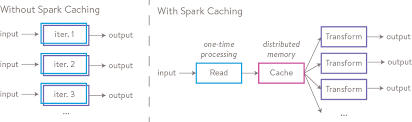

### Scenario:
You are analyzing customer transaction data for a retail business. You frequently calculate total sales and unique product counts grouped by regions, but the dataset involves multiple expensive transformations (joins and aggregations).

See the example below


In [ ]:
from pyspark.sql import SparkSession

# Step 1: Create a SparkSession
print("Creating SparkSession...")
spark = SparkSession.builder \
    .appName("Caching Example with Tracking") \
    .getOrCreate()

# Step 2: Create a sample dataset
data = [
    ("North", "Product1", 10),
    ("North", "Product2", 15),
    ("South", "Product1", 20),
    ("South", "Product3", 30),
]
columns = ["Region", "Product", "Sales"]

# Step 3: Create a DataFrame
df = spark.createDataFrame(data, columns)

# Step 4: Perform an expensive transformation
sales_summary = df.groupBy("Region").sum("Sales")

# Step 5: Cache the resulting DataFrame
print("Caching the aggregated DataFrame...")
sales_summary.cache()

# Step 6: Perform the first action: Display total sales by region
sales_summary.show()

# Step 7: Perform another action: Count the number of regions
print("Executing the second action: Counting the number of regions...")
region_count = sales_summary.count()
print(f"Number of regions: {region_count}")

# Step 8: Unpersist the DataFrame
print("Unpersisting the cached DataFrame to free up memory...")
sales_summary.unpersist()

Creating SparkSession...
Caching the aggregated DataFrame...
+------+----------+
|Region|sum(Sales)|
+------+----------+
| South|        50|
| North|        25|
+------+----------+

Executing the second action: Counting the number of regions...
Number of regions: 2
Unpersisting the cached DataFrame to free up memory...


DataFrame[Region: string, sum(Sales): bigint]

#### Scenario:
Processing a massive sales dataset that exhibits data skew in one region ("North"). The dataset is being used for generating both regional and product-level analytics.

#### Steps:
- Use salting to handle data skew when performing a join or aggregation.
- Optimize shuffle operations with repartition to balance partitions or coalesce to reduce partition size post-processing.
- Apply caching to intermediate results reused across different computations.

See the example below

In [ ]:
from pyspark.sql import functions as F

# Sample data with skewed region
data_skewed = [
    ("North", "Product1", 10),
    ("North", "Product2", 15),
    ("North", "Product3", 20),
    ("South", "Product1", 30),
    ("South", "Product3", 40),
]
df_skewed = spark.createDataFrame(data_skewed, columns)

# Step 1: Salting to handle skew
salted_df = df_skewed.withColumn("Region_Salted",
                                  F.concat(F.col("Region"),
                                           F.lit("_"),
                                           (F.rand() * 3).cast("int")))

# Aggregation on salted data
salted_agg = salted_df.groupBy("Region_Salted").sum("Sales")

# Revert the salt for final aggregation
unsalted_agg = salted_agg.withColumn("Region", F.split(F.col("Region_Salted"), "_")[0]) \
                         .groupBy("Region").sum("sum(Sales)")

# Step 2: Repartition the DataFrame for balanced processing
repartitioned_df = unsalted_agg.repartition(4, "Region")

# Step 3: Cache the result for further analytics
repartitioned_df.cache()

# Step 4: Perform multiple analyses on the cached DataFrame
print("Regional Sales Aggregation:")
repartitioned_df.show()

# Analyze unique product sales (hypothetical additional query)
product_sales = df_skewed.groupBy("Product").sum("Sales")
print("Product-wise Sales:")
product_sales.show()

# Cleanup
repartitioned_df.unpersist()

Regional Sales Aggregation:
+------+---------------+
|Region|sum(sum(Sales))|
+------+---------------+
| North|             45|
| South|             70|
+------+---------------+

Product-wise Sales:
+--------+----------+
| Product|sum(Sales)|
+--------+----------+
|Product2|        15|
|Product1|        40|
|Product3|        60|
+--------+----------+



DataFrame[Region: string, sum(sum(Sales)): bigint]

Key Highlights:

- Salting mitigates data skew, enabling balanced aggregation.
- Repartitioning distributes computation across nodes for optimal performance.
- Caching prevents redundant calculations when reusing repartitioned_df.

# Flattening JSON: Techniques for Flattening Nested JSON Data

---



Flattening nested JSON data is an essential technique in data processing, especially when working with large, hierarchical datasets in systems like Spark, MongoDB, or databases. JSON data often comes in a hierarchical or nested structure, which can be cumbersome for analysis or processing in tabular formats (like in DataFrames). Flattening refers to the process of converting these nested structures into a simple, flat structure.

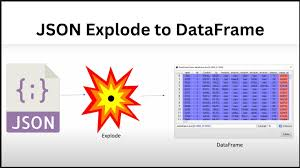




### Why Flattening JSON?
* Ease of Analysis: Most analytical tools (like SQL, pandas, or Spark) are designed to work with flat tables. Flattening makes data more compatible with these tools.
* Performance: Flattening can improve performance in certain processing tasks, as nested data requires more complex operations and joins to extract relevant information.
* Consistency: Flattening ensures that you can work with standardized structures (rows and columns) across different datasets.

### Real-World Example of Nested JSON
Imagine you're working with e-commerce transaction data where each transaction includes customer information, items purchased, and shipping details. The data is in the following nested format:
```
{
  "transaction_id": "12345",
  "customer": {
    "customer_id": "A123",
    "name": "John Doe",
    "address": {
      "street": "123 Main St",
      "city": "Springfield",
      "state": "IL",
      "zipcode": "62701"
    }
  },
  "items": [
    {"product_id": "P100", "quantity": 2, "price": 29.99},
    {"product_id": "P101", "quantity": 1, "price": 15.99}
  ],
  "total_amount": 75.97
}
```

```
transaction_id	customer_id	customer_name	customer_street	customer_city	customer_state	customer_zipcode	item_1_product_id	item_1_quantity	item_1_price	item_2_product_id	item_2_quantity	item_2_price	total_amount
12345	          A123	       John Doe	     123 Main St	     Springfield	    IL	          62701	            P100	          2	              29.99	        P101	              1	             15.99	        75.97

```

### Techniques for Flattening Nested JSON:
01. Flattening with Spark (PySpark)
02. Flattening with Pandas




In [ ]:
# Example 01 : PySpark provides powerful APIs for working with complex, nested data structures.
# You can use functions like explode, select, and withColumn to flatten JSON.

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, explode

# Initialize Spark session
spark = SparkSession.builder.appName("FlattenJSONExample").getOrCreate()

# Sample nested JSON data
data = [
    {
        "transaction_id": "12345",
        "customer": {
            "customer_id": "A123",
            "name": "John Doe",
            "address": {
                "street": "123 Main St",
                "city": "Springfield",
                "state": "IL",
                "zipcode": "62701"
            }
        },
        "items": [
            {"product_id": "P100", "quantity": 2, "price": 29.99},
            {"product_id": "P101", "quantity": 1, "price": 15.99}
        ],
        "total_amount": 75.97
    }
]

# Load the data into a DataFrame
df = spark.read.json(spark.sparkContext.parallelize(data))

# Flatten the customer data and address data
flattened_df = df.select(
    "transaction_id",
    "total_amount",
    col("customer.customer_id").alias("customer_id"),
    col("customer.name").alias("customer_name"),
    col("customer.address.street").alias("customer_street"),
    col("customer.address.city").alias("customer_city"),
    col("customer.address.state").alias("customer_state"),
    col("customer.address.zipcode").alias("customer_zipcode"),
    explode("items").alias("item")
)

flattened_df.show()
# Flatten the items array by extracting individual elements
final_df = flattened_df.select(
    "transaction_id",
    "total_amount",
    "customer_id",
    "customer_name",
    "customer_street",
    "customer_city",
    "customer_state",
    "customer_zipcode",
    col("item.product_id").alias("item_product_id"),
    col("item.quantity").alias("item_quantity"),
    col("item.price").alias("item_price")
)

# Show the flattened DataFrame
final_df.show(truncate=False)

+--------------+------------+-----------+-------------+---------------+-------------+--------------+----------------+----------------+
|transaction_id|total_amount|customer_id|customer_name|customer_street|customer_city|customer_state|customer_zipcode|            item|
+--------------+------------+-----------+-------------+---------------+-------------+--------------+----------------+----------------+
|         12345|       75.97|       A123|     John Doe|    123 Main St|  Springfield|            IL|           62701|{29.99, P100, 2}|
|         12345|       75.97|       A123|     John Doe|    123 Main St|  Springfield|            IL|           62701|{15.99, P101, 1}|
+--------------+------------+-----------+-------------+---------------+-------------+--------------+----------------+----------------+

+--------------+------------+-----------+-------------+---------------+-------------+--------------+----------------+---------------+-------------+----------+
|transaction_id|total_amount|c

In [ ]:
# Example 02 : If you're using pandas (especially in a non-distributed environment),
# you can flatten nested JSON using the json_normalize function.

import pandas as pd
from pandas import json_normalize

# Sample nested JSON data
data = [
    {
        "transaction_id": "12345",
        "customer": {
            "customer_id": "A123",
            "name": "John Doe",
            "address": {
                "street": "123 Main St",
                "city": "Springfield",
                "state": "IL",
                "zipcode": "62701"
            }
        },
        "items": [
            {"product_id": "P100", "quantity": 2, "price": 29.99},
            {"product_id": "P101", "quantity": 1, "price": 15.99}
        ],
        "total_amount": 75.97
    }
]

# Flatten the JSON data
flat_data = json_normalize(data,
                           record_path=['items'],
                           meta=['transaction_id', 'total_amount'],
                           meta_prefix='transaction_',
                           record_prefix='item_')

flat_data

,item_product_id,item_quantity,item_price,transaction_transaction_id,transaction_total_amount
0,P100,2,29.99,12345,75.97
1,P101,1,15.99,12345,75.97


# Unions in Pyspark

1. union():
The union() method is used to combine two DataFrames that have the same schema (same columns with the same names and types).

  `Behavior`: It returns a new DataFrame containing the rows from both DataFrames.

  `Important`: It removes duplicate rows by default, which means it behaves like UNION in SQL.
```python
  df1 = spark.createDataFrame([(1, 'Alice'), (2, 'Bob')], ['ID', 'Name'])
  df2 = spark.createDataFrame([(3, 'Charlie'), (4, 'David')], ['ID', 'Name'])

  # Using union() to combine DataFrames
  df_union = df1.union(df2)

  df_union.show()
```


*    ```
Output
  +---+-------+
  | ID|   Name|
  +---+-------+
  |  1|  Alice|
  |  2|    Bob|
  |  3|Charlie|
  |  4|  David|
  +---+-------+
   ```


2. unionAll():
In older versions of PySpark, unionAll() was used to combine DataFrames, including duplicates. It would include all rows, even if they were identical.

  `Behavior`: It combines DataFrames without removing duplicates.

  `Deprecation`: Starting from PySpark version 3.0, unionAll() has been deprecated and replaced by union(), which behaves like unionAll() in previous versions.
  ```python
  df1 = spark.createDataFrame([(1, 'Alice'), (2, 'Bob')], ['ID', 'Name'])
  df2 = spark.createDataFrame([(2, 'Bob'), (3, 'Charlie')], ['ID', 'Name'])

  # Using unionAll() to combine DataFrames
  df_union_all = df1.unionAll(df2)

  df_union_all.show()
```


 *   ```
 Output
+---+-------+
| ID|   Name|
+---+-------+
|  1|  Alice|
|  2|    Bob|
|  2|    Bob|
|  3|Charlie|
+---+-------+
    ```


3. unionByName():
The unionByName() method is used to combine DataFrames based on column names. It doesn't require the schemas to be in the same order, just that they have the same column names. Additionally, this method will allow unioning even if the columns are missing in one of the DataFrames (with allowMissingColumns=True).

  `Behavior`: It combines DataFrames by matching columns by name.

  `Use case`: When you have DataFrames with the same columns but in different orders or missing columns.

  ```python
  df1 = spark.createDataFrame([(1, 'Alice'), (2, 'Bob')], ['ID', 'Name'])
  df2 = spark.createDataFrame([('Charlie', 3), ('David', 4)], ['Name', 'ID'])

  # Using unionByName() to combine DataFrames
  df_union_by_name = df1.unionByName(df2)

  df_union_by_name.show()

  ```


 *     ```
 Output:
  +---+-------+
| ID|   Name|
+---+-------+
|  1|  Alice|
|  2|    Bob|
|  3|Charlie|
|  4|  David|
+---+-------+

      ```

4. unionByName() with allowMissingColumns=True:
This is useful when your DataFrames have different sets of columns. By setting allowMissingColumns=True, PySpark will add nulls for missing columns in the DataFrame that doesn't have those columns.

  ```python
  df1 = spark.createDataFrame([(1, 'Alice', 'NY'), (2, 'Bob', 'LA')], ['ID', 'Name', 'City'])
  df2 = spark.createDataFrame([(3, 'Charlie'), (4, 'David')], ['ID', 'Name'])

  # Using unionByName() with allowMissingColumns=True
  df_union_by_name_missing = df1.unionByName(df2, allowMissingColumns=True)

  df_union_by_name_missing.show()
  ```



 *     ```
Output
+---+-------+----+
| ID|   Name|City|
+---+-------+----+
|  1|  Alice|  NY|
|  2|    Bob|  LA|
|  3|Charlie|null|
|  4|  David|null|
+---+-------+----+
      ```


### Use Case:
You have sales transaction data from three different regions: North America, Europe, and Asia. These datasets have the following structure:

* `North America` has columns: TransactionID, CustomerID, Amount, City.
* `Europe` has columns: TransactionID, Amount, CustomerID, City.
* `Asia` has columns: TransactionID, CustomerID, Amount.

### Step-by-Step Process:
* Create sample DataFrames for each region.
* Combine the DataFrames using union(), ensuring no duplicates.
* Combine the DataFrames using unionAll(), which includes duplicates.
* Combine the DataFrames using unionByName(), allowing for different column orders and handling missing columns.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Initialize Spark session
spark = SparkSession.builder.master("local[1]").appName("Union Example").getOrCreate()

# Sample DataFrames to demonstrate union operation
data_na = [
    (1, 1001, 1500, 'New York'),
    (2, 1002, 2000, 'Chicago'),
    (3, 1003, 1800, 'San Francisco')
]

data_eu = [
    (4, 1500, 1001, 'London'),
    (5, 1600, 1002, 'Paris'),
    (6, 1700, 1003, 'Berlin')
]

data_asia = [
    (7, 1004, 2000),
    (8, 1005, 2100),
    (9, 1006, 2200)
]

# Define column names
columns = ['TransactionID', 'CustomerID', 'Amount', 'City']

# Create DataFrames
df_na = spark.createDataFrame(data_na, columns)
df_eu = spark.createDataFrame(data_eu, ['TransactionID', 'Amount', 'CustomerID', 'City'])  # Reordered columns for EU data
df_asia = spark.createDataFrame(data_asia, ['TransactionID', 'CustomerID', 'Amount'])  # Missing 'City' column

# Add missing column 'City' with null values in df_asia
df_asia_with_city = df_asia.withColumn('City', F.lit(None).cast("string"))

# Align the column order in df_eu (same as df_na)
df_eu_aligned = df_eu.select('TransactionID', 'CustomerID', 'Amount', 'City')

# Perform the union operation (this will remove duplicates)
df_union = df_na.union(df_eu_aligned).union(df_asia_with_city)

# Show the result after union (duplicates will be removed)
print("After union (duplicates removed):")
df_union.show(truncate=False)

After union (duplicates removed):
+-------------+----------+------+-------------+
|TransactionID|CustomerID|Amount|City         |
+-------------+----------+------+-------------+
|1            |1001      |1500  |New York     |
|2            |1002      |2000  |Chicago      |
|3            |1003      |1800  |San Francisco|
|4            |1001      |1500  |London       |
|5            |1002      |1600  |Paris        |
|6            |1003      |1700  |Berlin       |
|7            |1004      |2000  |NULL         |
|8            |1005      |2100  |NULL         |
|9            |1006      |2200  |NULL         |
+-------------+----------+------+-------------+



# File I/O in PySpark: Handling CSV, Excel, Parquet, ORC, and JSON Formats

  In PySpark, working with various data formats `(CSV, Excel, Parquet, ORC, and JSON)` is a common task when processing large datasets. Each format has its own advantages, and knowing how to handle these formats effectively can make data processing more efficient and flexible. Let's dive into these formats, along with some theory, funny liners, and real use case examples.

1. CSV (Comma-Separated Values)
* CSV is like that friend who brings a simple sandwich to the picnic but somehow makes it complicated when you try to add extra toppings.

  Advantages:

  - Simple format.
  - Can be opened by any text editor.
  - Supports basic structure (tables of rows and columns).

  Disadvantages:

  - Doesn't support complex data types (like nested structures or arrays).
  - No type metadata, so data types must be inferred.
   -Prone to errors in parsing (e.g., commas inside quotes).

  ```python
    # Read CSV file into a DataFrame
    df_sales = spark.read.option("header", "true").csv("sales_data.csv")

    # Show the DataFrame
    df_sales.show()

    # Perform a basic transformation (e.g., group by region)
    df_sales.groupBy("Region").agg(F.sum("Sales").alias("Total Sales")).show()
  ```

2. Excel (XLSX)
* Excel is like that overachiever in school – looks good but when you try to work with it in bulk, things get messy.

  Advantages:

  - Great for human interaction (e.g., formulas, charts).
  - Supports multiple sheets.
  - Widely used in business environments.

  Disadvantages:

  - Not as efficient as columnar formats (like Parquet).
  - Slow to read large datasets compared to other formats.
  - Requires external libraries for parsing in Spark.

  ```python
      # Read Excel file into a DataFrame
      df_employees = spark.read.format("com.crealytics.spark.excel").option("header", "true").load("employees.xlsx")

      # Show the DataFrame
      df_employees.show()

  ```

3. Parquet (Columnar Storage Format)


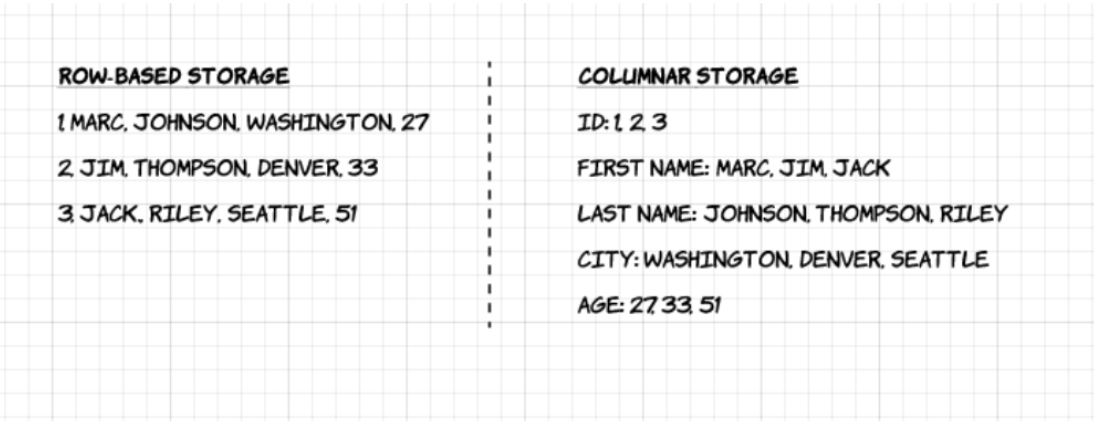

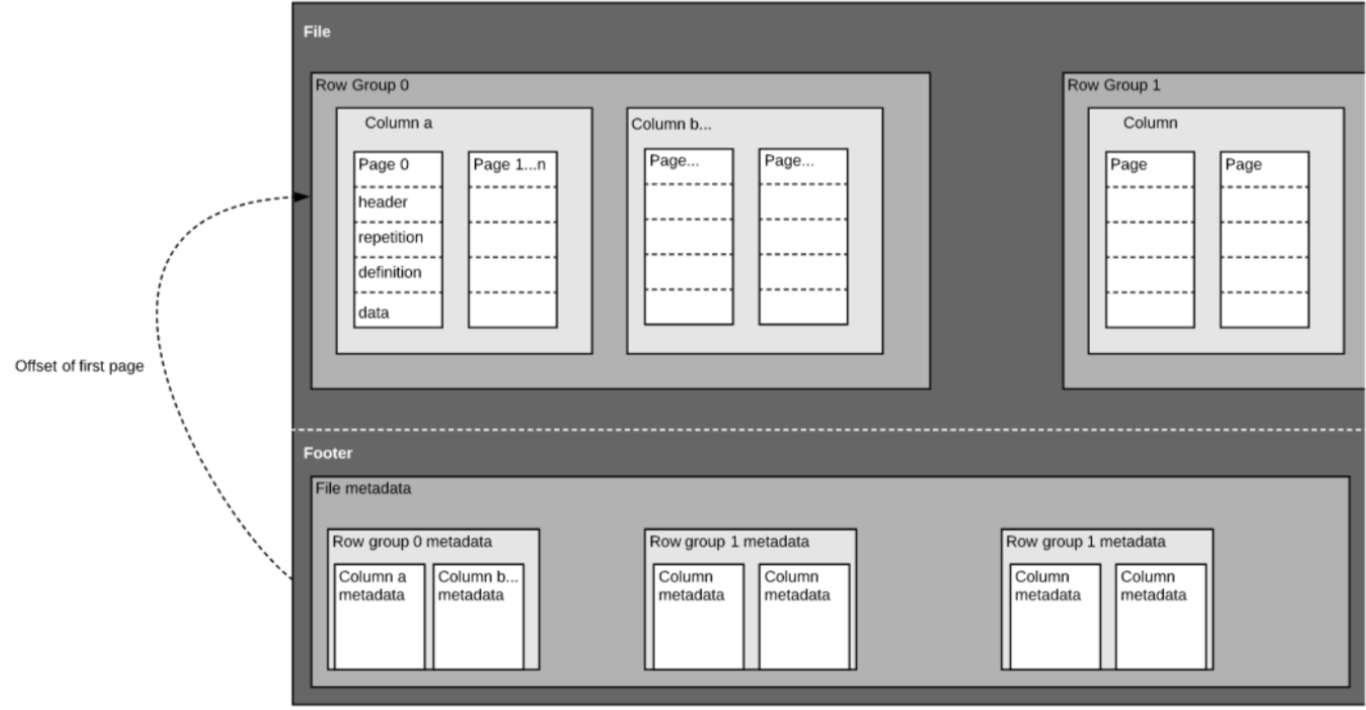

* Parquet is the data format equivalent of a well-organized closet – everything is neatly compressed, but you can't see what’s inside without opening it up.

  Advantages:

  - Optimized for read-heavy analytics workloads.
  - Supports schema evolution (adding/removing columns).
  - Provides high compression and faster query performance.

  Disadvantages:

  - Not human-readable (binary format).
  - Requires specialized tools to inspect the data.

  ```python
  # Read Parquet file into a DataFrame
  df_transactions = spark.read.parquet("transactions.parquet")

  # Show the DataFrame
  df_transactions.show()

  # Perform a transformation (e.g., filtering)
  df_filtered = df_transactions.filter(df_transactions["Amount"] > 1000)
  df_filtered.show()

  ```

4. ORC (Optimized Row Columnar)
* ORC is like a high-performance athlete: fast, efficient, but not very good at hanging out at parties (because you can't inspect it directly).

  Advantages:

  - Faster read and write operations compared to other formats.
  - Highly optimized for compression and storage efficiency.
  - Works well with Hive and Spark SQL.

  Disadvantages:

  - Like Parquet, it's not human-readable.
  - Primarily used in the Hadoop ecosystem.

  ```python
  # Read ORC file into a DataFrame
  df_orders = spark.read.orc("orders.orc")

  # Show the DataFrame
  df_orders.show()

  # Perform a transformation (e.g., sum the total sales)
  df_total_sales = df_orders.groupBy("Category").agg(F.sum("Sales").alias("Total Sales"))
  df_total_sales.show()

  ```

5. JSON (JavaScript Object Notation)
* JSON is like a puzzle: easy to read, but once you start nesting, it can become a real brain teaser.

  Advantages:

  - Human-readable format.
  - Supports nested data structures.
  - Widely used in web development and APIs.

  Disadvantages:

  - Not as efficient for large datasets compared to binary formats like Parquet and ORC.
  - Parsing nested JSON can be complex.

  ```python
  # Read JSON file into a DataFrame
  df_reviews = spark.read.json("reviews.json")

  # Show the DataFrame
  df_reviews.show()

  # Perform a transformation (e.g., count reviews by product)
  df_product_reviews = df_reviews.groupBy("ProductID").agg(F.count("ReviewID").alias("Review Count"))
  df_product_reviews.show()

  ```












In [ ]:
# Example 01 : Reading and writing in CSV File
from pyspark.sql import Row

# Read CSV file into a DataFrame
df_sales = spark.read.option("header", "true").csv("/content/sample_data/sales_data.csv")

# Sample manual entries to add
manual_data = [
    Row(order_id="30276", report_date="16-11-2022 00:00", customer_name="Ali", order_level="L2",
        shipping_type="Train", area="Northwest", province="Gansu", city="Jiayuguan", product_type="Office",
        product_sub_type="Pen", product_name="Kleencut_Forged_Office_Shears_by_Acme_United_Corporation",
        product_box="Paperbag", order_number=55, order_amt=248.18, back_point=0.19, profit_amt=-92.17,
        price=9.82, shipping_cost=6.09, shipping_date="20-11-2022 00:00"),
    Row(order_id="30277", report_date="17-11-2022 00:00", customer_name="John", order_level="L1",
        shipping_type="Air", area="Southwest", province="Hunan", city="Changsha", product_type="Electronics",
        product_sub_type="Phone", product_name="iPhone_13_Pro_Max", product_box="Box", order_number=10,
        order_amt=1200.50, back_point=0.25, profit_amt=500.10, price=1200.50, shipping_cost=15.30,
        shipping_date="22-11-2022 00:00")
]

# Convert the list of rows to a DataFrame
df_manual = spark.createDataFrame(manual_data)

# Union the existing DataFrame with the new manual data
df_combined = df_sales.union(df_manual)

# Show the DataFrame
df_sales.show()

# Perform a basic transformation (e.g., group by region)
df_grouped = df_sales.groupBy("area").agg(F.sum("price").alias("Total Price"))

# Show the result
df_grouped.show()

# Write the transformed DataFrame to a new CSV file
df_grouped.write.option("header", "true").csv("transformed_data")

+--------+----------------+-------------+-----------+-------------+---------+------------+----------+------------+----------------+--------------------+-----------+------------+---------+----------+----------+-------+-------------+----------------+
|order_id|     report_date|customer_name|order_level|shipping_type|     area|    province|      city|product_type|product_sub_type|        product_name|product_box|order_number|order_amt|back_point|profit_amt|  price|shipping_cost|   shipping_date|
+--------+----------------+-------------+-----------+-------------+---------+------------+----------+------------+----------------+--------------------+-----------+------------+---------+----------+----------+-------+-------------+----------------+
|     225| 2022/8/14 00:00|          Ali|         L1|        Plain|   Center|       Hunan|  Changsha|      Office|           Paper|Kleencut_ Forged ...|  Small Box|          42|   229.88|      0.05|    -75.25|   5.28|         5.06| 2022/8/15 00:00|
|   

In [ ]:
# 1. Filtering Data Based on Conditions

# Filter products where price > 50
df_filtered = df_sales.filter(df_sales["price"] > 50)

# Show the filtered result
df_filtered.show()


+--------+----------------+-------------+-----------+-------------+---------+------------+----------+------------+----------------+--------------------+-------------+------------+---------+----------+----------+-------+-------------+----------------+
|order_id|     report_date|customer_name|order_level|shipping_type|     area|    province|      city|product_type|product_sub_type|        product_name|  product_box|order_number|order_amt|back_point|profit_amt|  price|shipping_cost|   shipping_date|
+--------+----------------+-------------+-----------+-------------+---------+------------+----------+------------+----------------+--------------------+-------------+------------+---------+----------+----------+-------+-------------+----------------+
|     548|2020/12/11 00:00|          Ali|         L1|        Train|   Center|       Henan| Zhengzhou|   Technique|       Accessory|Kleencut_ Forged ...|    Small bag|          66|  2876.77|      0.09|  -1078.79|  88.06|         56.1|2020/12/13 00:

In [ ]:
# 2. Aggregating Data (Group By and Sum, Average, etc.)

# Group by city and calculate total order_amt and profit_amt
df_grouped = df_sales.groupBy("city").agg(
    F.sum("order_amt").alias("Total Order Amount"),
    F.sum("profit_amt").alias("Total Profit Amount")
)

# Show the result
df_grouped.show()

+-----------+------------------+-------------------+
|       city|Total Order Amount|Total Profit Amount|
+-----------+------------------+-------------------+
|      Benxi|           3447.01|             324.17|
|   Qiqihaer|        16926.5255|-4071.8399999999992|
|     Linfen|        26526.1345| 1244.8600000000001|
| Wulanchabu|         27138.974|            -1379.7|
|Zhangjiakou|            302.94|              -30.2|
|  Xuancheng|           2194.98|             956.73|
| Hulunbeier|            666.05|              46.69|
|     Jining|            135.38|             -71.12|
|  Guangzhou|110949.17850000001| 27776.870000000006|
|   Zhoushan|15428.390000000001| -393.9099999999999|
| Shizuishan|            3111.0|              863.0|
|    Qingdao|           2019.78|             365.98|
|   Tongliao|        21784.6895|             2488.7|
|   Shaoguan|10571.738000000001|-27.590000000000074|
|   Nanchang|             17.72|             -15.34|
|     Dazhou|          1289.127|             -

In [ ]:
# 3. Sorting Data

# Sort by order_amt in descending order
df_sorted = df_sales.orderBy(df_sales["order_amt"], ascending=False)

# Show the sorted result
df_sorted.show()

+--------+----------------+-------------+-----------+-------------+---------+------------+-------------+------------+----------------+--------------------+-------------+------------+---------+----------+----------+------+-------------+----------------+
|order_id|     report_date|customer_name|order_level|shipping_type|     area|    province|         city|product_type|product_sub_type|        product_name|  product_box|order_number|order_amt|back_point|profit_amt| price|shipping_cost|   shipping_date|
+--------+----------------+-------------+-----------+-------------+---------+------------+-------------+------------+----------------+--------------------+-------------+------------+---------+----------+----------+------+-------------+----------------+
|    5702|2021/11/27 00:00|        Blake|         L3|        Train|Northeast|Heilongjiang|      Haerbin|      Office|             Box|Kleencut_ Forged ...|    Small Box|          34|   998.62|      0.12|     73.66| 50.06|        13.94|2021/1

In [ ]:
# 4. Data Transformation (Adding New Columns)

# Add a new column for total cost
df_transformed = df_sales.withColumn("total_cost", df_sales["price"] + df_sales["shipping_cost"])

# Show the transformed result
df_transformed.show()

+--------+----------------+-------------+-----------+-------------+---------+------------+----------+------------+----------------+--------------------+-----------+------------+---------+----------+----------+-------+-------------+----------------+------------------+
|order_id|     report_date|customer_name|order_level|shipping_type|     area|    province|      city|product_type|product_sub_type|        product_name|product_box|order_number|order_amt|back_point|profit_amt|  price|shipping_cost|   shipping_date|        total_cost|
+--------+----------------+-------------+-----------+-------------+---------+------------+----------+------------+----------------+--------------------+-----------+------------+---------+----------+----------+-------+-------------+----------------+------------------+
|     225| 2022/8/14 00:00|          Ali|         L1|        Plain|   Center|       Hunan|  Changsha|      Office|           Paper|Kleencut_ Forged ...|  Small Box|          42|   229.88|      0.0

In [ ]:
# 5. Handling Missing Data (Null Values)

# Fill missing values in price and order_amt with 0
df_filled = df_sales.fillna({"price": 0, "order_amt": 0})

# Show the filled result
df_filled.show()

+--------+----------------+-------------+-----------+-------------+---------+------------+----------+------------+----------------+--------------------+-----------+------------+---------+----------+----------+-------+-------------+----------------+
|order_id|     report_date|customer_name|order_level|shipping_type|     area|    province|      city|product_type|product_sub_type|        product_name|product_box|order_number|order_amt|back_point|profit_amt|  price|shipping_cost|   shipping_date|
+--------+----------------+-------------+-----------+-------------+---------+------------+----------+------------+----------------+--------------------+-----------+------------+---------+----------+----------+-------+-------------+----------------+
|     225| 2022/8/14 00:00|          Ali|         L1|        Plain|   Center|       Hunan|  Changsha|      Office|           Paper|Kleencut_ Forged ...|  Small Box|          42|   229.88|      0.05|    -75.25|   5.28|         5.06| 2022/8/15 00:00|
|   